In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm


#To define the datasets to be substracted from one another
path0 = "/Users/malika/Documents/Five Lives/SI Data Analysis/LifestyleCognition/Datasets & Data cleaning/df0_clean.csv"
df0 = pd.read_csv(path0)
df0 = df0.drop('Unnamed: 0', axis=1)
df0 = df0.set_index('participant_id')
df0['A0male'] = pd.get_dummies(df0['A0sex'], drop_first=True)

This code will generate all distributions for the SI data.

The codes are subdivided according to the data type.

To get the figures, copy paste the figures in each i loop and paste it to a google doc (I found that saving the figure to a folder using spyder was doing some weird placement of text so I preferred to use a notebook)

In [2]:
df0

,A0assessmentVersion,A0sex,A0education_level,A0work_status,A0work_days,A0work_shifts,A0current_highest_occupation_level,A0retired_work_years,A0retired_highest_occupation_level,A0height_cm,...,A0alcohol_unit,A0glasses_water,A0time_reading,A0time_mental_stimulation,A0time_instrument,A0time_skill,A0relaxed_scale,A0mood_rate,A0enjoyment_activities,A0male
participant_id,,,,,,,,,,,,,,,,,,,,,
de74382f-4fb3-4773-a37b-1d22e0df858f,5,female,postgraduate,retired,NaN,NaN,NaN,41.0,mid_level,165,...,7,2.0,3.0,3.0,2.0,2.0,8.0,7.0,7.0,0
6f5c0ad6-10e7-4c0f-a754-cde03e4ff2b1,5,female,bachelor,working,5.0,0.0,mid_level,NaN,NaN,165,...,0,3.0,2.0,2.0,0.0,1.0,7.0,7.0,8.0,0
db64119e-d5a2-4a1c-894c-8006d9fb857e,5,male,postgraduate,retired,NaN,NaN,NaN,50.0,mid_level,180,...,1,1.0,3.0,1.0,0.0,0.0,8.0,7.0,7.0,1
d5e4e248-1e06-418f-b8fe-a9a05b189df4,5,female,bachelor,retired,NaN,NaN,NaN,40.0,mid_level,152,...,0,1.0,3.0,3.0,3.0,1.0,7.0,8.0,10.0,0
075330cc-2ce6-4596-b1a3-b94d4315ef22,5,female,college,retired,NaN,NaN,NaN,40.0,mid_level,160,...,3,1.0,2.0,2.0,0.0,1.0,8.0,7.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ec6fbd68-ea86-49d2-859d-78e5d2100f96,5,female,postgraduate,working,6.0,0.0,senior,NaN,NaN,165,...,0,2.0,3.0,3.0,0.0,0.0,1.0,2.0,2.0,0
63ddb754-e820-475a-8880-2e4f0de92a45,5,female,postgraduate,working,5.0,0.0,mid_level,NaN,NaN,173,...,0,3.0,0.0,2.0,0.0,0.0,8.0,6.0,8.0,0
b8df7ff8-6f43-4a44-82e2-dbd149c54541,5,female,postgraduate,retired,NaN,NaN,NaN,52.0,senior,155,...,5,1.0,2.0,0.0,0.0,0.0,3.0,8.0,10.0,0


## Add variables

Modification/ Addition of variables needed 

In [3]:
#Add BMI
df0['A0bmi'] = (df0['A0weight_kg']/((df0['A0height_cm']/100)**2))

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, de74382f-4fb3-4773-a37b-1d22e0df858f to 51ad07aa-f1a8-4e99-80a1-c8d991518d7a
Columns: 111 entries, A0assessmentVersion to A0bmi
dtypes: float64(64), int64(30), object(16), uint8(1)
memory usage: 492.2+ KB


We see here there are 4 categories, after looking in more details, I also found some strings, and floats. 

In [5]:
# Create separate list for separate categories
float64 = []
int64 = []
uint8 = []
error = []
string = []
float_list = []
for i in df0.columns:
    if df0[i][0] == np.nan:
        error.append(i)
    elif type(df0[i][0]) == np.float64:
        float64.append(i)
    elif type(df0[i][0]) == np.int64:
        int64.append(i)
    elif type(df0[i][0]) == np.uint8:
        uint8.append(i)
    elif type(df0[i][0]) == str:
        string.append(i)
    elif type(df0[i][0]) == float:
        float_list.append(i)
    else:
        error.append(i)

In [6]:
#Do we have all variables in our lists?
len(float64) + len(int64) + len(uint8) + len(error) + len(string) + len(float_list) == len(df0.columns)

True

## Categories corrections
Some categories were wrongfully attributed (I realized while running the distributions)


In [7]:
float_list

['A0current_highest_occupation_level']

In [8]:
df0['A0current_highest_occupation_level']

participant_id
de74382f-4fb3-4773-a37b-1d22e0df858f          NaN
6f5c0ad6-10e7-4c0f-a754-cde03e4ff2b1    mid_level
db64119e-d5a2-4a1c-894c-8006d9fb857e          NaN
d5e4e248-1e06-418f-b8fe-a9a05b189df4          NaN
075330cc-2ce6-4596-b1a3-b94d4315ef22          NaN
                                          ...    
ec6fbd68-ea86-49d2-859d-78e5d2100f96       senior
63ddb754-e820-475a-8880-2e4f0de92a45    mid_level
b8df7ff8-6f43-4a44-82e2-dbd149c54541          NaN
abe8f4ec-37d0-42b5-9a4f-a1fbd6da7978       junior
51ad07aa-f1a8-4e99-80a1-c8d991518d7a          NaN
Name: A0current_highest_occupation_level, Length: 567, dtype: object

In [9]:
# seen as a float because value [0] was NaN but is actually a string
string.append('A0current_highest_occupation_level')

Some variables were seen as floats but are actually True/False

In [10]:
TrueFalse = ['A0relative_dementia', 'A0diagnosis_diabetes', 'A0stroke', 'A0mini_stroke',  'A0b12',
 'A0thyroid_disease',
 'A0renal_problem',
 'A0alcohol_disorder',
 'A0hearing_problems',
 'A0visual_problems',
 'A0colour_blind',
 'A0parkinsons',
 'A0epilepsy',
 'A0multiple_sclerosis',
 'A0migraines',
 'A0diagnosis_neurological_diseases_other',
 'A0head_injury',
 'A0loss_of_consciousness',
 'A0bowel_disease_IBS',
 'A0diagnosis_dementia',
 'A0diagnosis_mci',
 'A0today_date',
'A0work_shifts',
'A0relative_dementia_65',
'A0diabetes_medication',
 'A0insulin',
'A0b12_replacement',
 'A0thyroxine_replacement',
 'A0dialysis',
 'A0hearing_problems_treated',
 'A0visual_problems_treated',
 'A0personality_disorder',
 'A0psychiatric_diagnosis_other',
 'A0dyslexia',
 'A0lipid_lowering_medications',
 'A0anti_inflammatory_medications',
 'A0anti_hypertensives_medications',
 'A0antidepressants',
 'A0anxiolytic',
 'A0antiparkinson_medications',
 'A0glucose_medications',
 'A0regular_medications_other',
 'A0moving_during_sleep',
 'A0insomnia',
 'A0sleep_apnea',
 'A0sleep_issue_other'] 

In [11]:
string

['A0sex',
 'A0education_level',
 'A0work_status',
 'A0retired_highest_occupation_level',
 'A0proficiency_english',
 'A0number_languages',
 'A0area_residence',
 'A0memory_compared_to_others',
 'A0memory_compared_to_years_ago',
 'A0assistance',
 'A0blood_pressure_estimation',
 'A0resting_heart_rate_estimation',
 'A0cholesterol_medication',
 'A0cholesterol_estimation',
 'A0diagnosis_neurological_diseases',
 'A0current_highest_occupation_level']

In [12]:
# remove TrueFalse variables from the float64 and int64 lists
for i in TrueFalse:
    if i in int64:
        int64.remove(i)
    elif i in float64:
        float64.remove(i)

In [13]:
float64

['A0work_days',
 'A0retired_work_years',
 'A0blood_pressure_exact',
 'A0resting_heart_rate',
 'A0blood_glucose_estimation',
 'A0blood_glucose_exact',
 'A0cholesterol_mmol/L',
 'A0LDL_mmol/L',
 'A0HDL_mmol/L',
 'A0lifestyle_improvement_likelihood_scale',
 'A0discussion_with_doctor_likelihood_scale',
 'A0family_member_repeat_statements_frequency',
 'A0family_member_date_frequency',
 'A0family_member_check_date_frequency',
 'A0family_member_finance_frequency',
 'A0family_member_direction_frequency',
 'A0_age',
 'A0_years_since_last_job',
 'A0heart_problem_sum',
 'A0heart_treatment_sum',
 'A0mental_problem_sum',
 'A0typing_problem_sum',
 'A0hours_sleep',
 'A0tiredness',
 'A0PA_duration',
 'A0PA_intensity',
 'A0PA_score',
 'A0smoking_situation',
 'A0smoking_amount',
 'A0socialI',
 'A0fruit_veg',
 'A0glasses_water',
 'A0time_reading',
 'A0time_mental_stimulation',
 'A0time_instrument',
 'A0time_skill',
 'A0relaxed_scale',
 'A0mood_rate',
 'A0enjoyment_activities',
 'A0bmi']

In [14]:
#Last check: Do we have all variables in our lists?
len(float64) + len(int64) + len(uint8) + len(error) + len(string) + len(TrueFalse) == len(df0.columns)

True

In [15]:
# No need to use uint8 because there is only the gender which is already in the string list
uint8

['A0male']

In [16]:
# No error
error

[]

Our final categories are: float64, int64, string and TrueFalse

# 1. int64 plots
Let's start to plot integer (int64)

In [17]:
# When running distribution, we see that time to answer has extreme values
df = df0[df0['A0timeToAnswerMs'] < 90000]
#df=df0

In [18]:
int64

['A0assessmentVersion',
 'A0height_cm',
 'A0weight_kg',
 'A0timeToAnswerMs',
 'A0Ass_all',
 'A0loneliness',
 'A0sleep_problems',
 'A0alcohol_unit']

In [19]:
df['A0Ass_all'].unique()

array([0, 1, 2, 4, 3, 5, 6])

In [20]:
## List with names of variables

int64_names = ['Version of the assessment',
 'Height (cm)',
 'Weight (kg)',
 'Time to answer (ms)',
 'Need for assistance',
 'Feeling of loneliness',
 'Sum of sleep problems',
 'Number of units of alcohol total']

In [21]:
if len(int64) == len(int64_names):
    int64_all = list(zip(int64, int64_names))

In [22]:
int64_all

[('A0assessmentVersion', 'Version of the assessment'),
 ('A0height_cm', 'Height (cm)'),
 ('A0weight_kg', 'Weight (kg)'),
 ('A0timeToAnswerMs', 'Time to answer (ms)'),
 ('A0Ass_all', 'Need for assistance'),
 ('A0loneliness', 'Feeling of loneliness'),
 ('A0sleep_problems', 'Sum of sleep problems'),
 ('A0alcohol_unit', 'Number of units of alcohol total')]

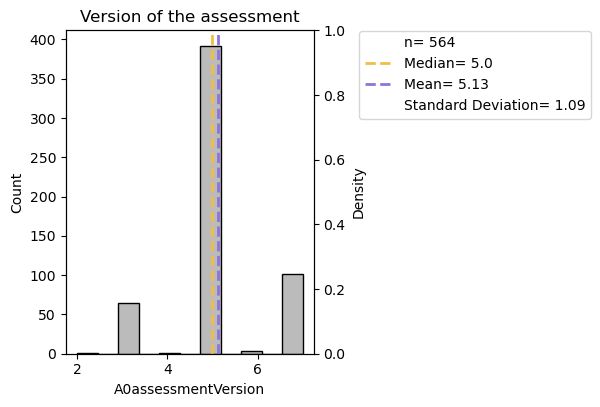

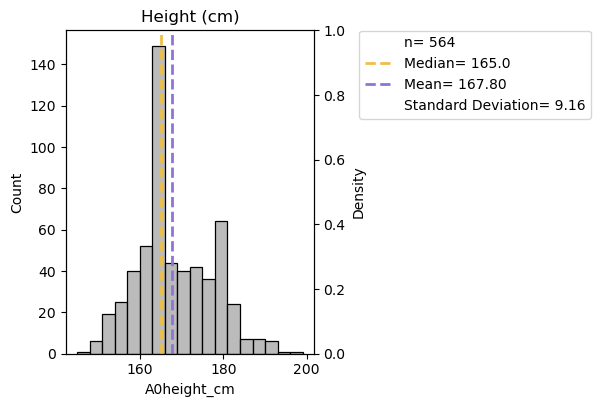

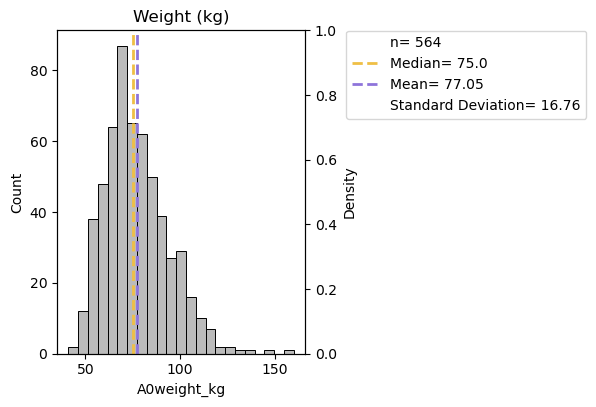

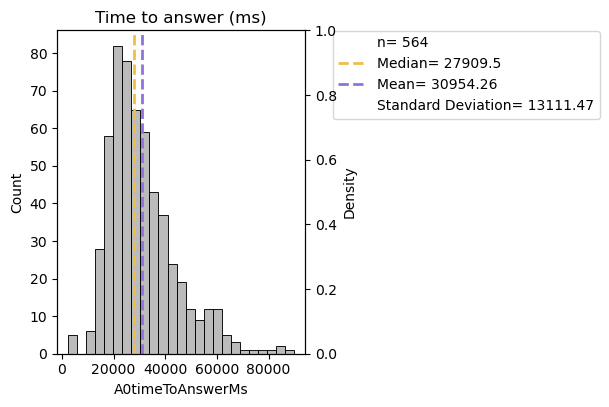

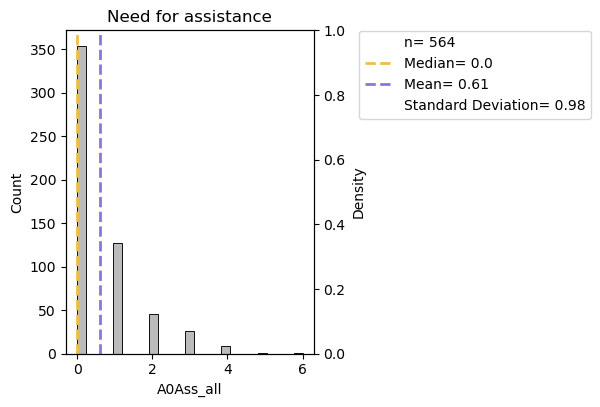

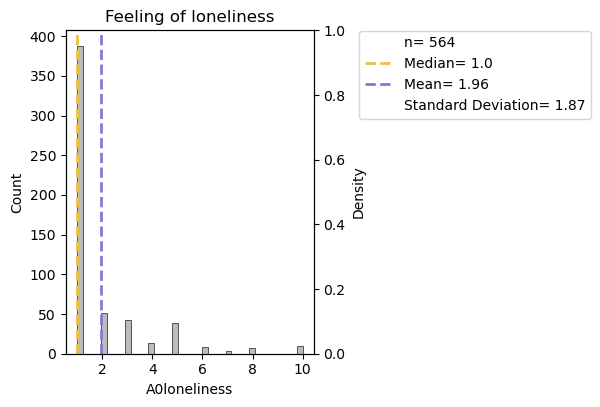

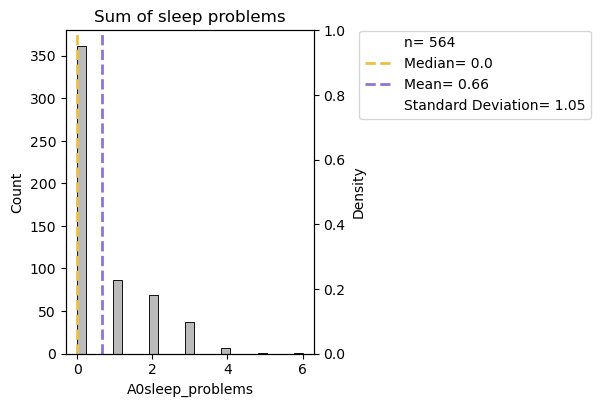

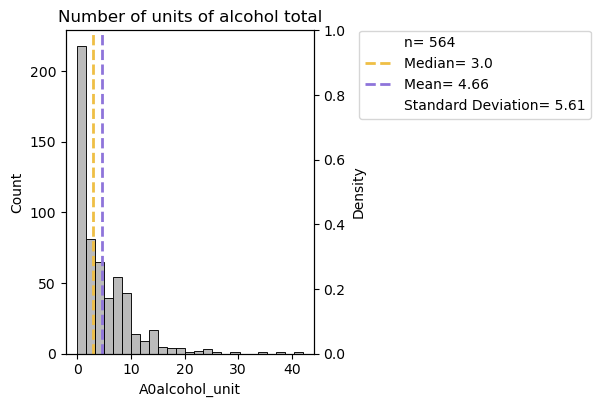

In [23]:
for i in int64_all:
    #Set mean, median and std
    var = i[0]
    title = i[1]
    median = str(df[var].median())
    mean = "%.2f" % df[var].mean() 
    std = "%.2f" % df[var].std()
    
    plt.figure(figsize=(3.2, 4.2))
    ax = sns.histplot(data = df, x = var, color = "#a4a4a4ff")
    plt.plot([], [], ' ', label = f'n= {df[var].count()}')
    plt.axvline(df[var].median(), linestyle='dashed', linewidth=2, color = '#efbf45', label = f'Median= {median}')
    plt.axvline(df[var].mean(), linestyle='dashed', linewidth=2, color = '#8e74da', label = f'Mean= {mean}')
    plt.plot([], [], ' ', label = f'Standard Deviation= {std}')
    plt.legend(loc='upper center', bbox_to_anchor=(1.65, 1.02), shadow=False, ncol=1)
    plt.title(title)
    plt.xlabel(var)
    plt.ylabel('Count')
    ax2 = ax.twinx()
    ax2.set_ylabel('Density')
    ax2.set_ylim(0,1)
    plt.show()
    

Make tuples list

## 2.  float64


In [24]:
len(float64)

40

In [25]:
float64

['A0work_days',
 'A0retired_work_years',
 'A0blood_pressure_exact',
 'A0resting_heart_rate',
 'A0blood_glucose_estimation',
 'A0blood_glucose_exact',
 'A0cholesterol_mmol/L',
 'A0LDL_mmol/L',
 'A0HDL_mmol/L',
 'A0lifestyle_improvement_likelihood_scale',
 'A0discussion_with_doctor_likelihood_scale',
 'A0family_member_repeat_statements_frequency',
 'A0family_member_date_frequency',
 'A0family_member_check_date_frequency',
 'A0family_member_finance_frequency',
 'A0family_member_direction_frequency',
 'A0_age',
 'A0_years_since_last_job',
 'A0heart_problem_sum',
 'A0heart_treatment_sum',
 'A0mental_problem_sum',
 'A0typing_problem_sum',
 'A0hours_sleep',
 'A0tiredness',
 'A0PA_duration',
 'A0PA_intensity',
 'A0PA_score',
 'A0smoking_situation',
 'A0smoking_amount',
 'A0socialI',
 'A0fruit_veg',
 'A0glasses_water',
 'A0time_reading',
 'A0time_mental_stimulation',
 'A0time_instrument',
 'A0time_skill',
 'A0relaxed_scale',
 'A0mood_rate',
 'A0enjoyment_activities',
 'A0bmi']

In [26]:
#Get the titles for the graphs
float64_names = ['# of work days a week',
 '# of work years (if retired)',
 'Blood pressure value (mmHg)',
 'Resting heart rate (bpm)',
 'Blood glucose estimation (mmol/L)',
 'Blood glucose exact value (mmol/L)',
 'Blood cholesterol (mmol/L)',
 'LDL cholesterol (mmol/L)',
 'HDL cholesterol (mmol/L)',
 'Likelihood of lifestyle improvement (0 to 10)',
 'Likelihood to discuss brain health with your doctor (0 to 10)',
 'Informant: Participant repeats themself? (0 to 10)',
 'Informant: Troubles remembering dates or time (0 to 10)',
 'Informant: Needs support to remember a date (0 to 10)',
 'Informant: Troubles paying bills or managing finances (0 to 10)',
 'Informant: Difficulties finding their way around when out of the house? (0 to 10)',
 'Age',
 '# of years since last worked',
 'Sum of all heart problems',
 'Sum of all heart treatments',
 'Sum of all mental problems',
 'Sume of all typing problems',
 'Average hours of sleep/night',
 'Tiredness during the day',
 'Physical activity duration/week',
 'Intensity of physical exercise',
 'Physical activity score (duration * intensity)',
 'Smoking situation (0=never, 1=past, 2=current smoker)',
 'Amount smoked',
 'Level of social interaction',
 'Range of fruit and vegetable',
 'Level of water drinked',
 'Level of time reading',
 'Amount of time spent doing mentally stimulating actiivities',
 'Amount of time spent playing an instrument',
 'Amount of time spent learning a new skill',
 'Level of relaxation',
 'Mood scale',
 'Level of enjoyment of activities',
 'BMI']

In [27]:
if len(float64) == len(float64_names):
    float64_all = list(zip(float64, float64_names))
else:
    print('ERROR: lists not same length')

In [28]:
float64_all

[('A0work_days', '# of work days a week'),
 ('A0retired_work_years', '# of work years (if retired)'),
 ('A0blood_pressure_exact', 'Blood pressure value (mmHg)'),
 ('A0resting_heart_rate', 'Resting heart rate (bpm)'),
 ('A0blood_glucose_estimation', 'Blood glucose estimation (mmol/L)'),
 ('A0blood_glucose_exact', 'Blood glucose exact value (mmol/L)'),
 ('A0cholesterol_mmol/L', 'Blood cholesterol (mmol/L)'),
 ('A0LDL_mmol/L', 'LDL cholesterol (mmol/L)'),
 ('A0HDL_mmol/L', 'HDL cholesterol (mmol/L)'),
 ('A0lifestyle_improvement_likelihood_scale',
  'Likelihood of lifestyle improvement (0 to 10)'),
 ('A0discussion_with_doctor_likelihood_scale',
  'Likelihood to discuss brain health with your doctor (0 to 10)'),
 ('A0family_member_repeat_statements_frequency',
  'Informant: Participant repeats themself? (0 to 10)'),
 ('A0family_member_date_frequency',
  'Informant: Troubles remembering dates or time (0 to 10)'),
 ('A0family_member_check_date_frequency',
  'Informant: Needs support to rememb

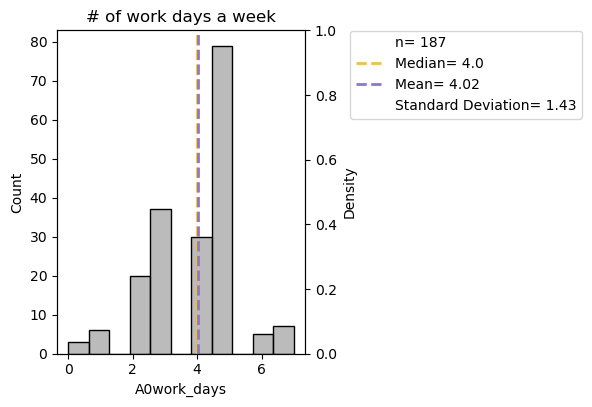

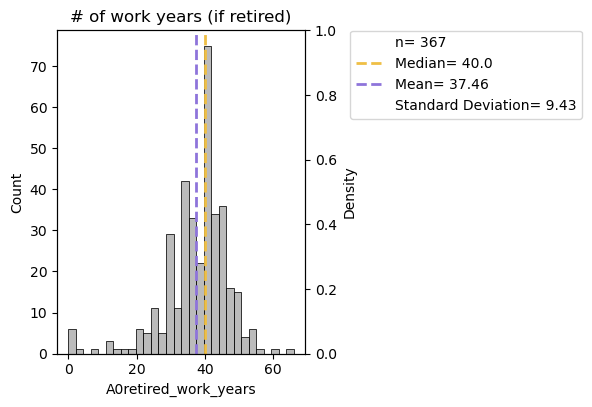

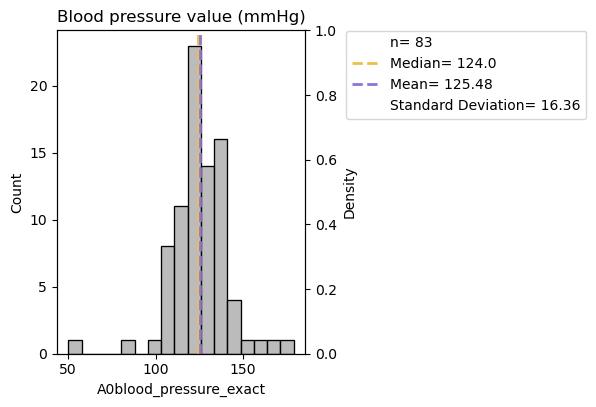

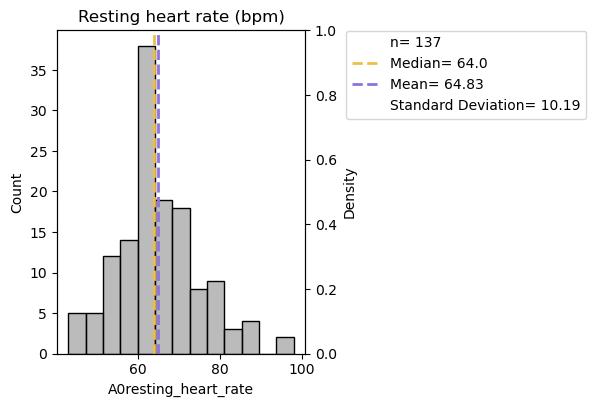

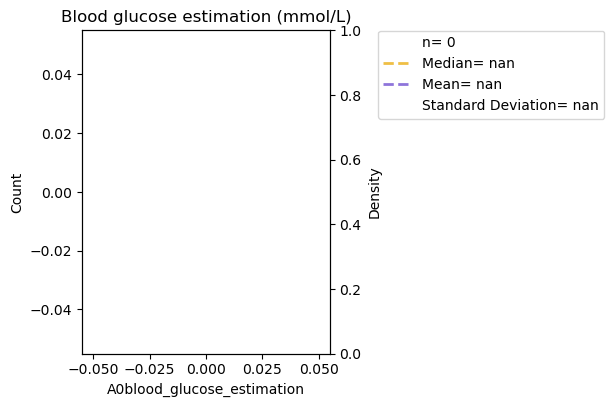

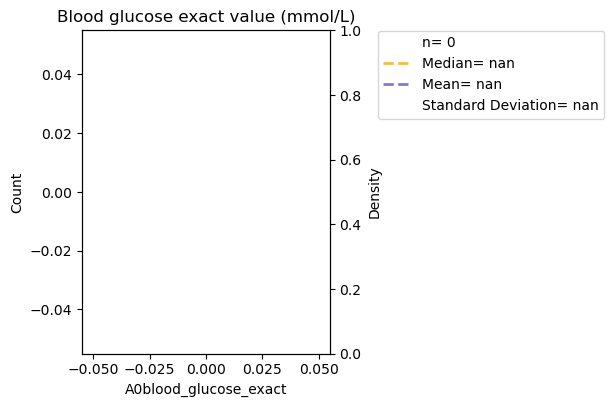

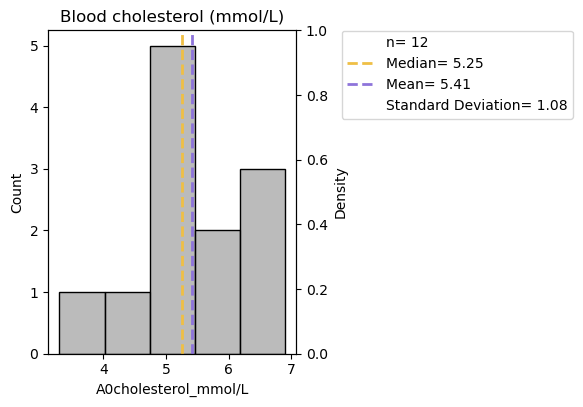

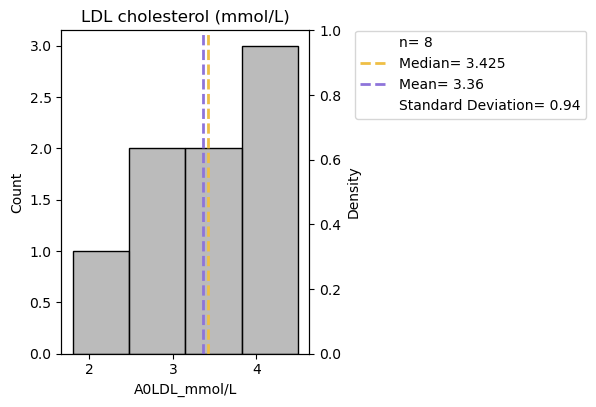

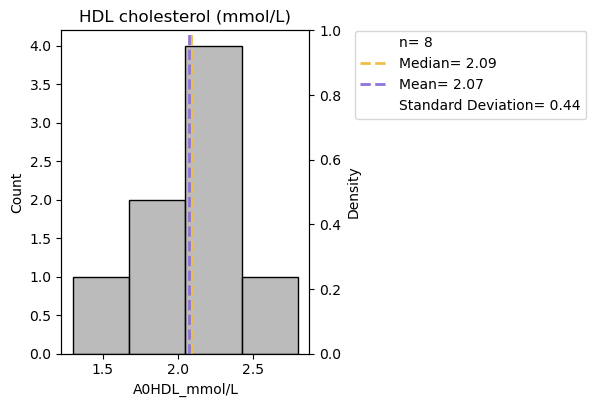

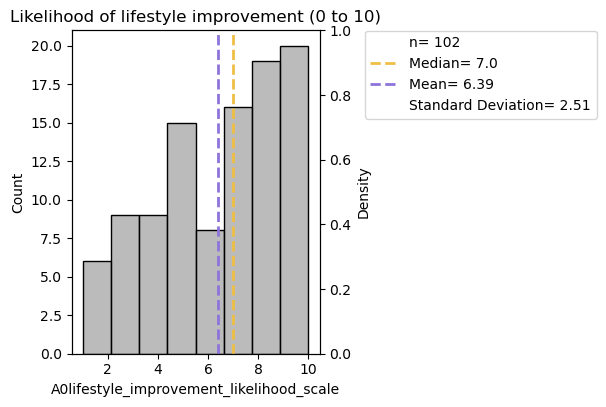

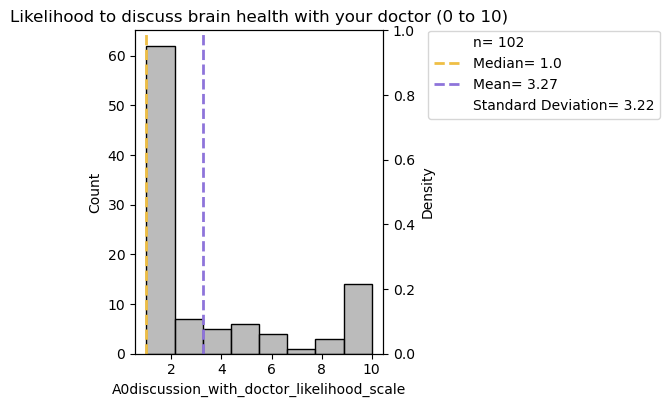

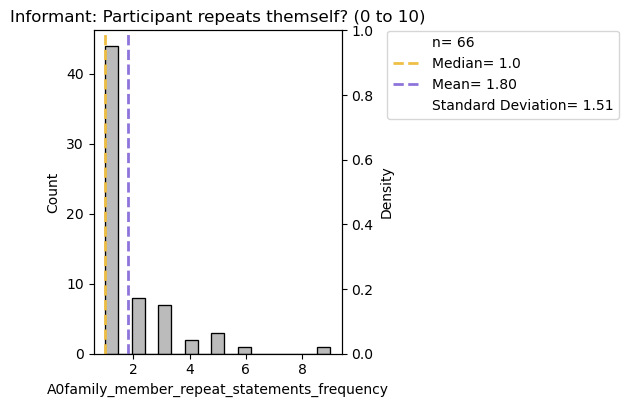

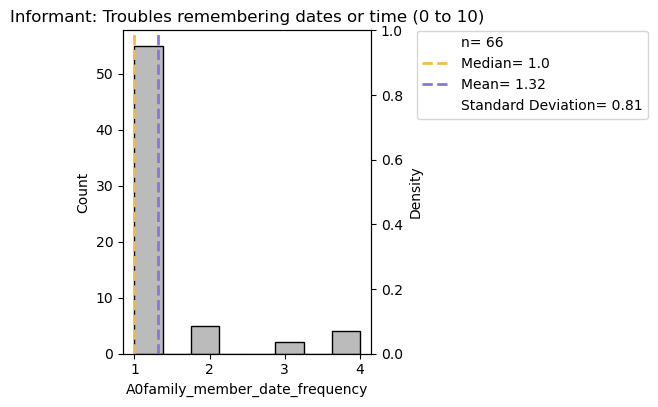

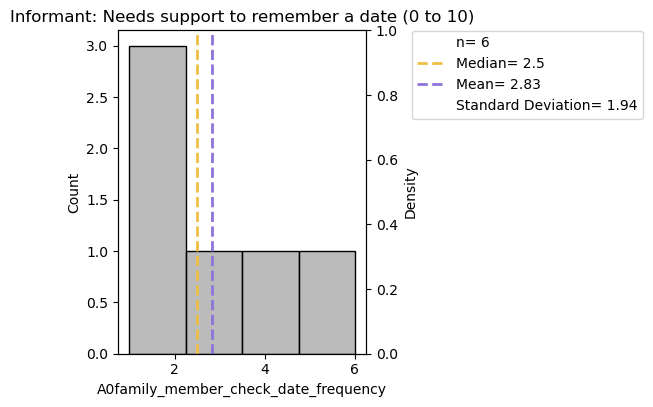

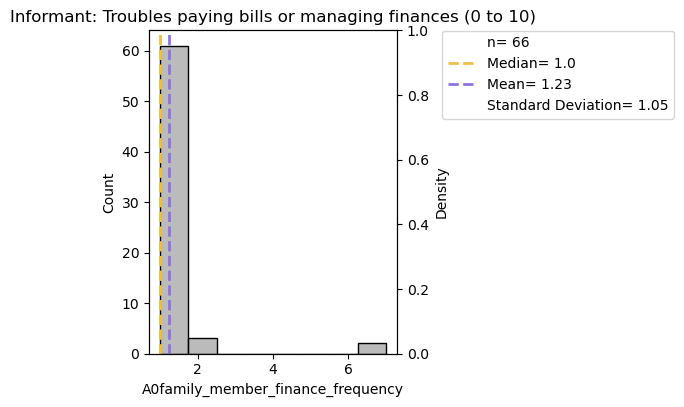

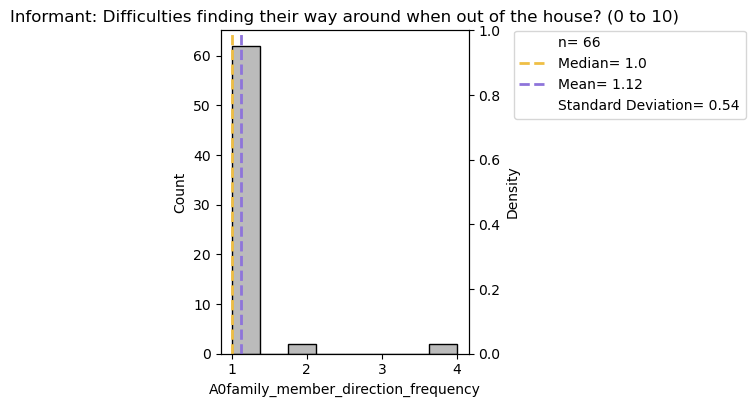

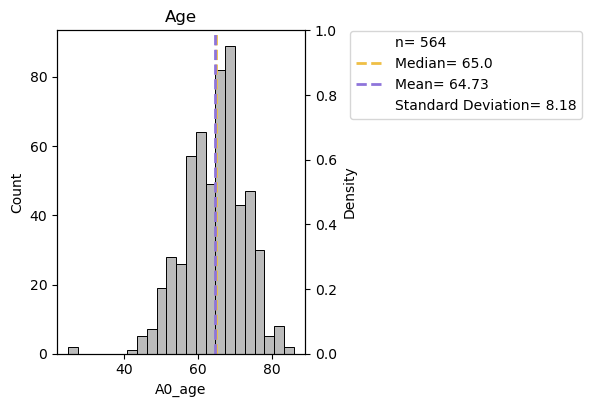

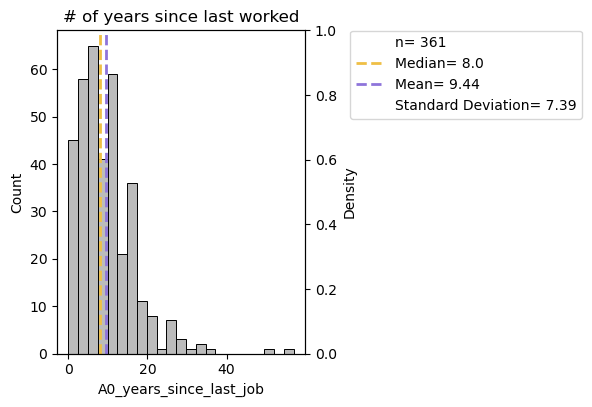

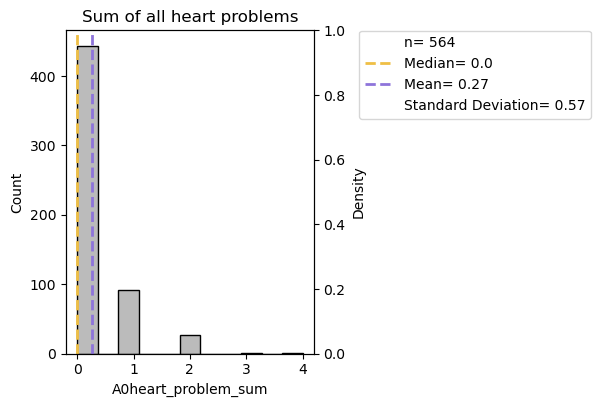

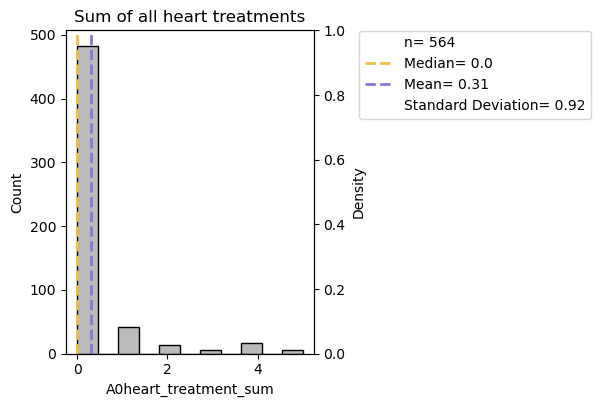

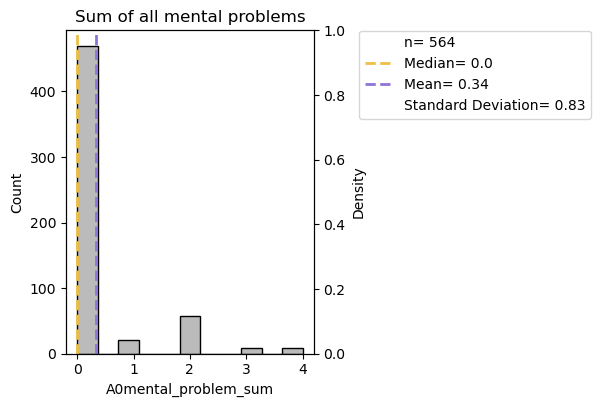

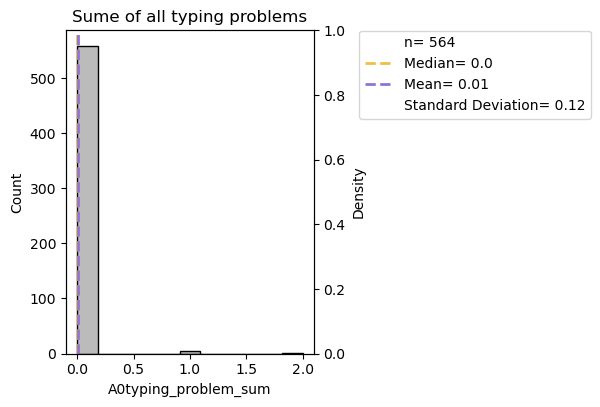

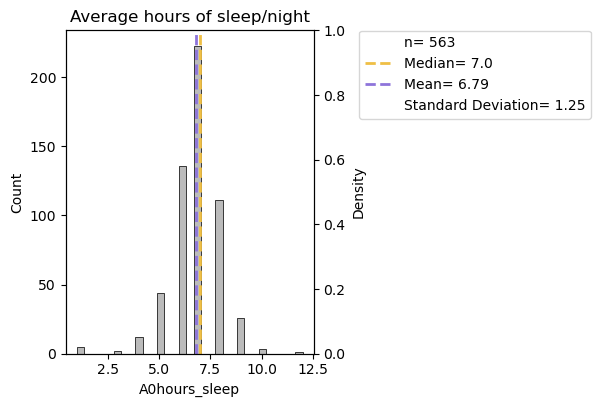

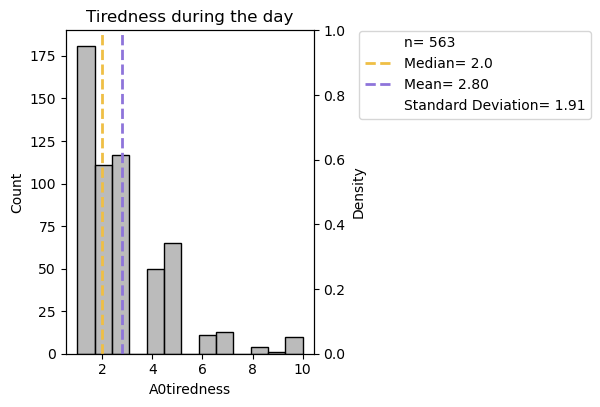

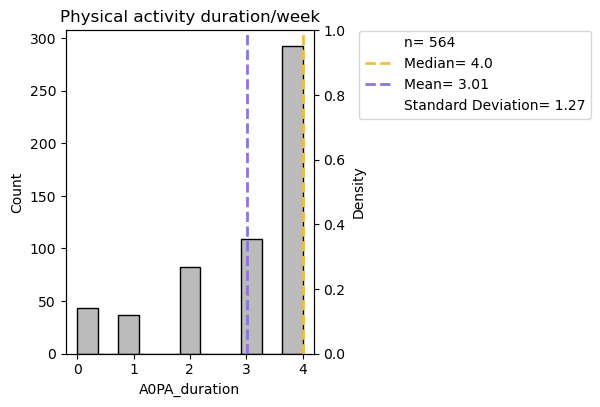

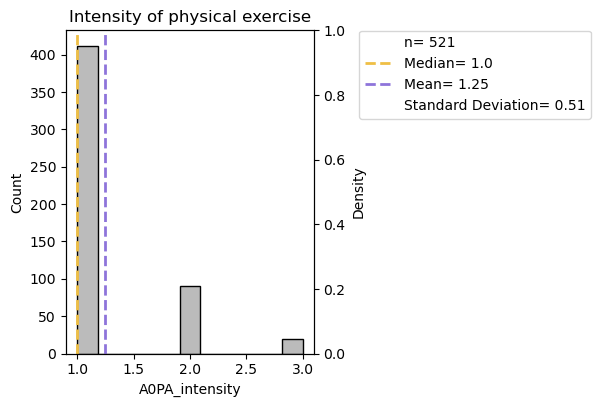

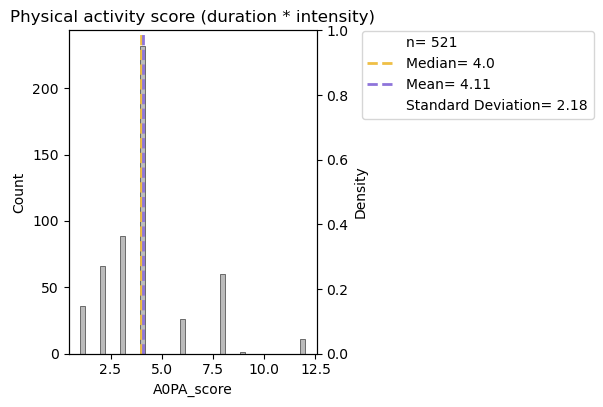

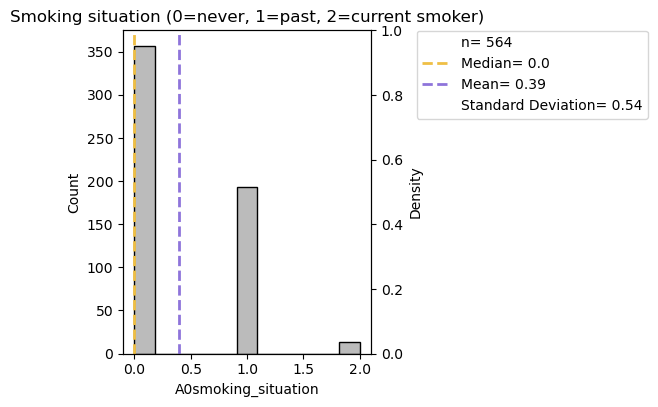

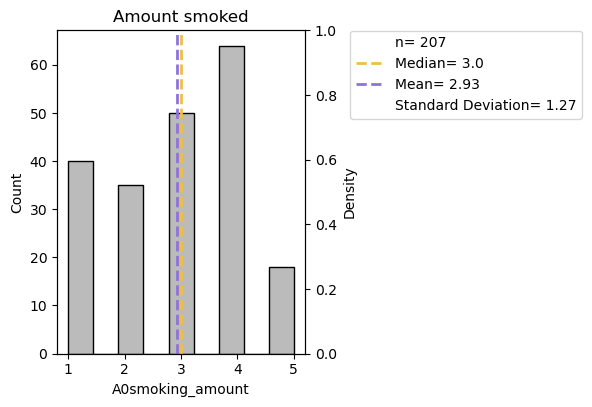

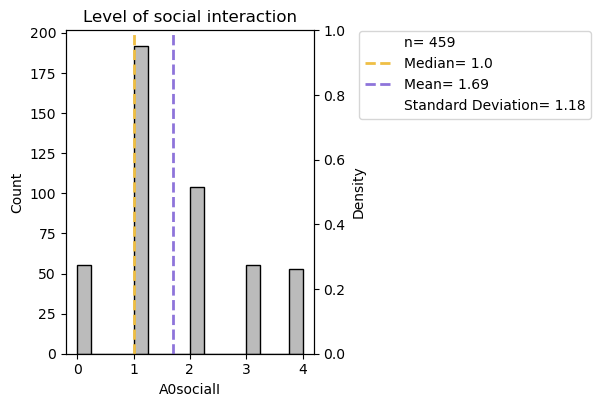

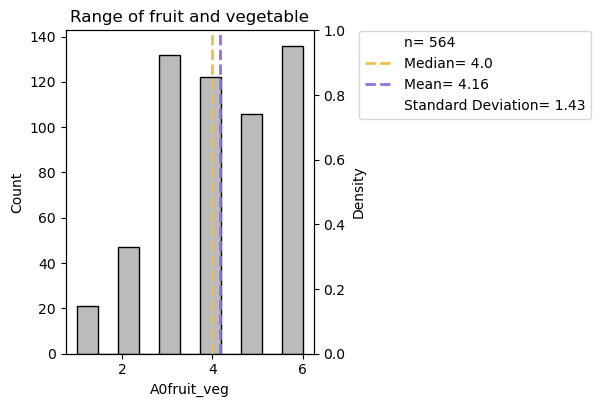

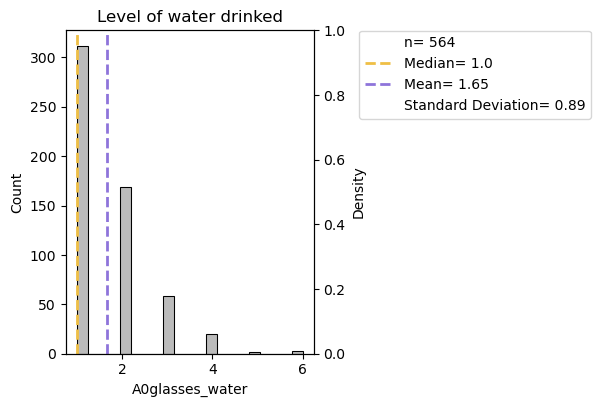

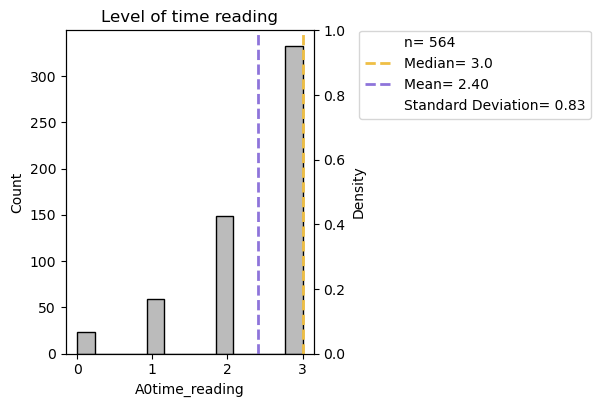

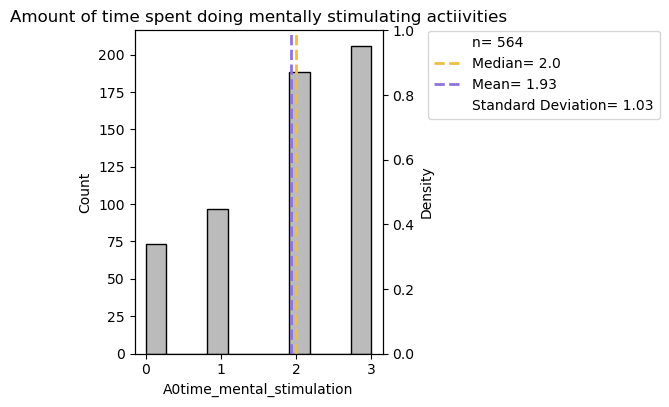

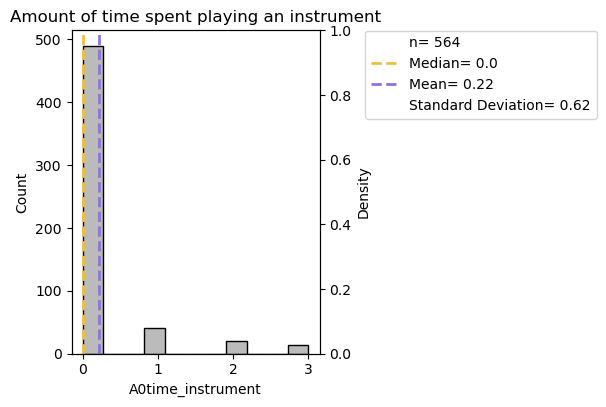

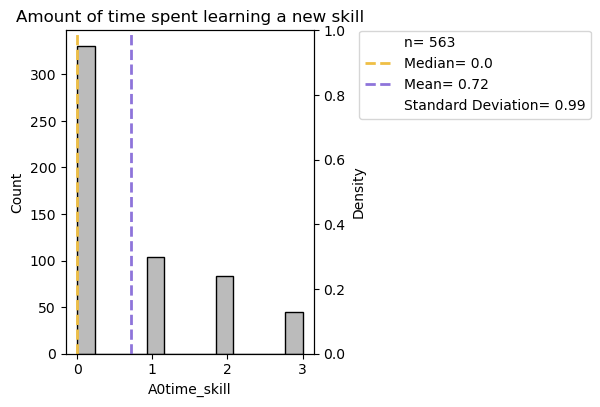

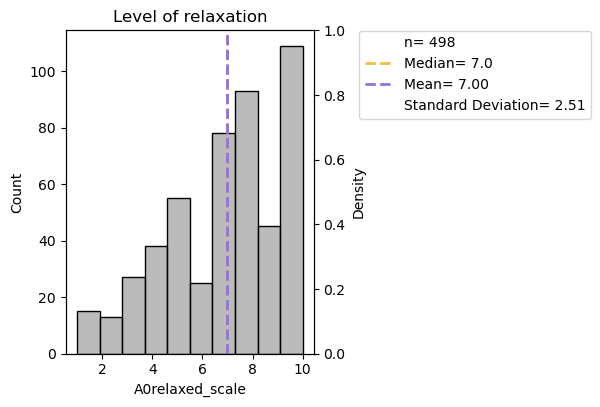

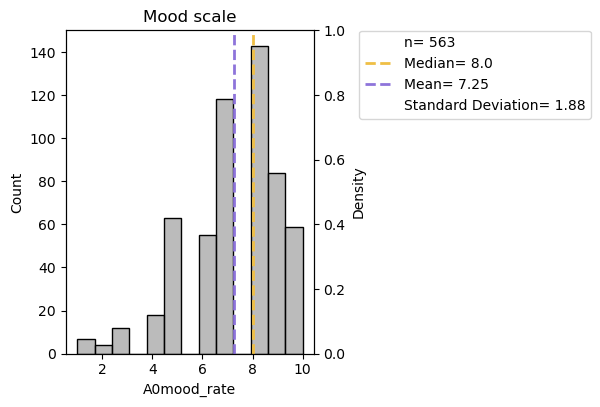

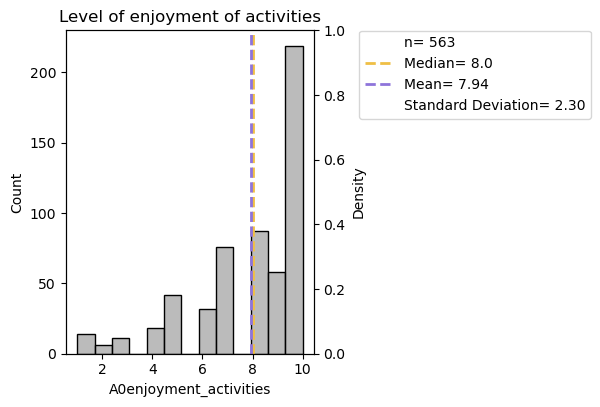

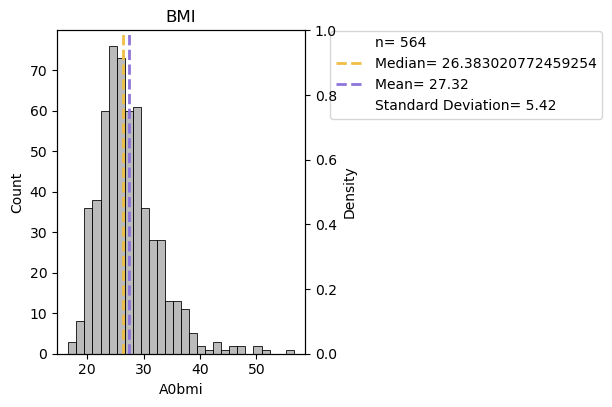

In [29]:
for i in float64_all:
    #Set mean, median and std
    var = i[0]
    title = i[1]
    median = str(df[var].median())
    mean = "%.2f" % df[var].mean() 
    std = "%.2f" % df[var].std()
    
    plt.figure(figsize=(3.2, 4.2))
    ax = sns.histplot(data = df, x = var, color = "#a4a4a4ff")
    plt.plot([], [], ' ', label = f'n= {df[var].count()}')
    plt.axvline(df[var].median(), linestyle='dashed', linewidth=2, color = '#efbf45', label = f'Median= {median}')
    plt.axvline(df[var].mean(), linestyle='dashed', linewidth=2, color = '#8e74da', label = f'Mean= {mean}')
    plt.plot([], [], ' ', label = f'Standard Deviation= {std}')
    plt.legend(loc='upper center', bbox_to_anchor=(1.65, 1.02), shadow=False, ncol=1)
    plt.title(title)
    plt.xlabel(var)
    plt.ylabel('Count')
    ax2 = ax.twinx()
    ax2.set_ylabel('Density')
    ax2.set_ylim(0,1)
    plt.show()

In [30]:
df['A0hours_sleep']

participant_id
de74382f-4fb3-4773-a37b-1d22e0df858f    6.0
6f5c0ad6-10e7-4c0f-a754-cde03e4ff2b1    8.0
db64119e-d5a2-4a1c-894c-8006d9fb857e    7.0
d5e4e248-1e06-418f-b8fe-a9a05b189df4    5.0
075330cc-2ce6-4596-b1a3-b94d4315ef22    8.0
                                       ... 
ec6fbd68-ea86-49d2-859d-78e5d2100f96    6.0
63ddb754-e820-475a-8880-2e4f0de92a45    7.0
b8df7ff8-6f43-4a44-82e2-dbd149c54541    6.0
abe8f4ec-37d0-42b5-9a4f-a1fbd6da7978    7.0
51ad07aa-f1a8-4e99-80a1-c8d991518d7a    8.0
Name: A0hours_sleep, Length: 564, dtype: float64

## 3. TrueFalse

In [31]:
len(TrueFalse)

46

In [32]:
TrueFalse

['A0relative_dementia',
 'A0diagnosis_diabetes',
 'A0stroke',
 'A0mini_stroke',
 'A0b12',
 'A0thyroid_disease',
 'A0renal_problem',
 'A0alcohol_disorder',
 'A0hearing_problems',
 'A0visual_problems',
 'A0colour_blind',
 'A0parkinsons',
 'A0epilepsy',
 'A0multiple_sclerosis',
 'A0migraines',
 'A0diagnosis_neurological_diseases_other',
 'A0head_injury',
 'A0loss_of_consciousness',
 'A0bowel_disease_IBS',
 'A0diagnosis_dementia',
 'A0diagnosis_mci',
 'A0today_date',
 'A0work_shifts',
 'A0relative_dementia_65',
 'A0diabetes_medication',
 'A0insulin',
 'A0b12_replacement',
 'A0thyroxine_replacement',
 'A0dialysis',
 'A0hearing_problems_treated',
 'A0visual_problems_treated',
 'A0personality_disorder',
 'A0psychiatric_diagnosis_other',
 'A0dyslexia',
 'A0lipid_lowering_medications',
 'A0anti_inflammatory_medications',
 'A0anti_hypertensives_medications',
 'A0antidepressants',
 'A0anxiolytic',
 'A0antiparkinson_medications',
 'A0glucose_medications',
 'A0regular_medications_other',
 'A0moving

In [33]:
# Lets do them in true/false again
for i in TrueFalse:
    for l in df.index:
        if df.loc[l, i] == 0:
            df.loc[l, i] = 'False'
        elif df.loc[l, i]== 1:
            df.loc[l, i] = 'True'            

/var/folders/v1/y7275_7j2dvby3mpgs8lb9580000gn/T/ipykernel_28971/2576438507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[l, i] = 'False'
/var/folders/v1/y7275_7j2dvby3mpgs8lb9580000gn/T/ipykernel_28971/2576438507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[l, i] = 'True'


In [34]:
TrueFalse_names = ['First degree relative diagnosed with dementia?',
 'Diagnosed with diabetes',
 'Ever had a stroke',
 'Ever had a mini stroke',
 'B12 deficiency',
 'Thyroid disease',
 'Renal problem',
 'Alcohol disorder',
 'Hearing problems',
 'Visual problems',
 'Color blind',
 'Parkingsons',
 'Epilepsy',
 'Multiple sclerosis',
 'Migraines',
 'Diagnosis of other neurological diseases',
 'Had head injury',
 'Had loss of consciousness',
 'Have been diagnosed with bowel disease',
 'Has had dementia diagnosis',
 'Has had MCI diagnosis',
 'Knows what is todays date' ,
 'Does shift work',
 'Relative diagnosed with dementia after 65yo',
 'Takes diabetes medication',
 'Takes insuline',
 'Takes B12 replacement',
 'Takes thyroxine replacement',
 'Is on dialysis',
 'Hearing problems are being treated',
 'Visual problems are being treated',
 'Has personality disorder',
 'Has another psychiatric diagnosis',
 'Has dyslexia',
 'Takes lipid lowering medications',
 'Takes anti-inflammatory medications',
 'Takes anti-hypertensives medications',
 'Takes antidepressants',
 'Takes anxiolytic',
 'Takes antiparkinson medications',
 'Takes glucose medications',
 'Takes other regular medications',
 'Does violent movements during sleep',
 'Has insomnia',
 'Does sleep apnea',
 'Has other sleep issue']

In [35]:
if len(TrueFalse) == len(TrueFalse_names):
    TrueFalse_all = list(zip(TrueFalse, TrueFalse_names))
else:
    print('ERROR: lists not same length')

In [36]:
TrueFalse_all

[('A0relative_dementia', 'First degree relative diagnosed with dementia?'),
 ('A0diagnosis_diabetes', 'Diagnosed with diabetes'),
 ('A0stroke', 'Ever had a stroke'),
 ('A0mini_stroke', 'Ever had a mini stroke'),
 ('A0b12', 'B12 deficiency'),
 ('A0thyroid_disease', 'Thyroid disease'),
 ('A0renal_problem', 'Renal problem'),
 ('A0alcohol_disorder', 'Alcohol disorder'),
 ('A0hearing_problems', 'Hearing problems'),
 ('A0visual_problems', 'Visual problems'),
 ('A0colour_blind', 'Color blind'),
 ('A0parkinsons', 'Parkingsons'),
 ('A0epilepsy', 'Epilepsy'),
 ('A0multiple_sclerosis', 'Multiple sclerosis'),
 ('A0migraines', 'Migraines'),
 ('A0diagnosis_neurological_diseases_other',
  'Diagnosis of other neurological diseases'),
 ('A0head_injury', 'Had head injury'),
 ('A0loss_of_consciousness', 'Had loss of consciousness'),
 ('A0bowel_disease_IBS', 'Have been diagnosed with bowel disease'),
 ('A0diagnosis_dementia', 'Has had dementia diagnosis'),
 ('A0diagnosis_mci', 'Has had MCI diagnosis'),
 (

In [37]:
df[var].count()

564

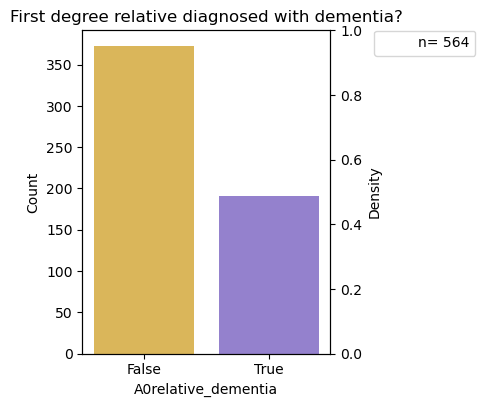

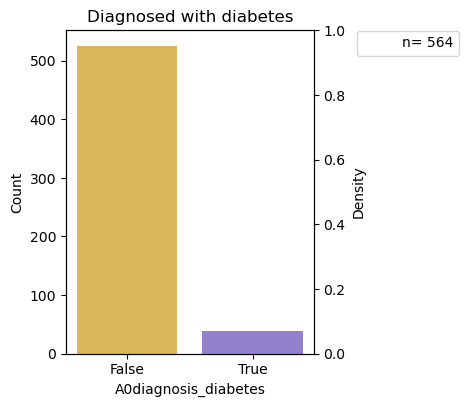

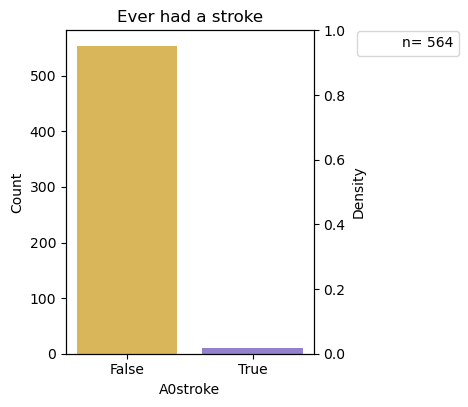

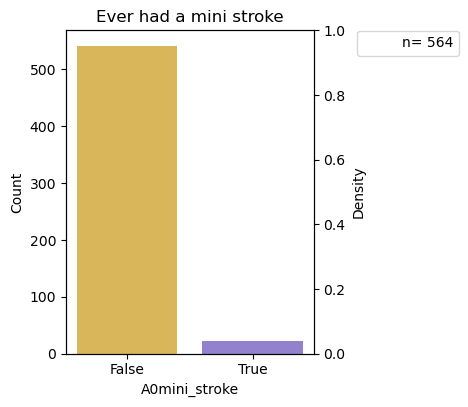

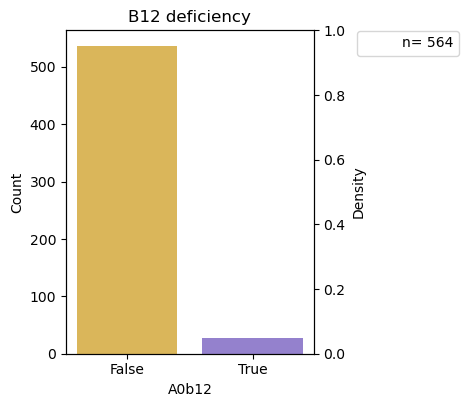

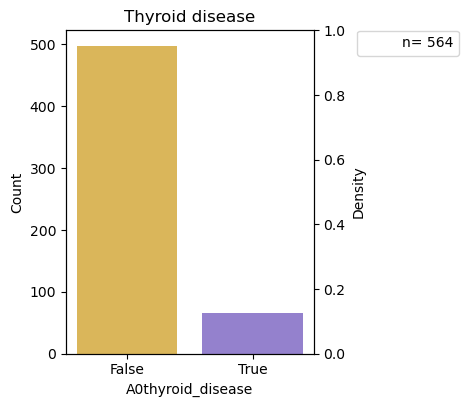

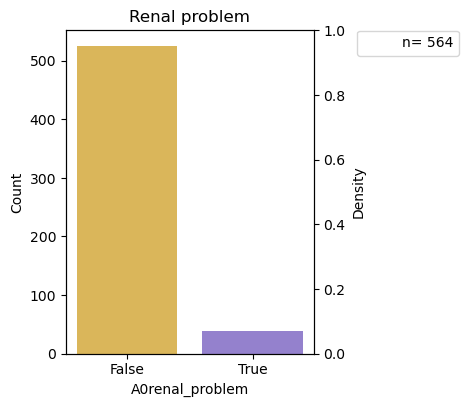

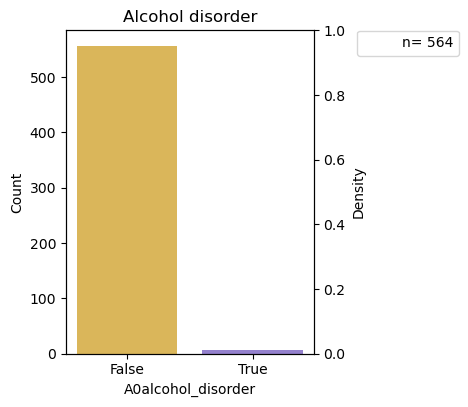

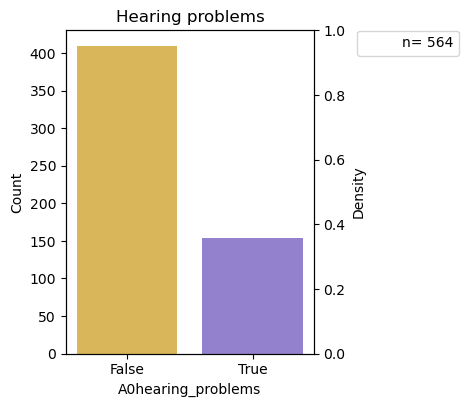

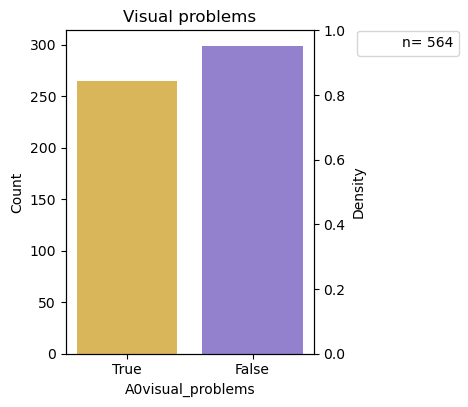

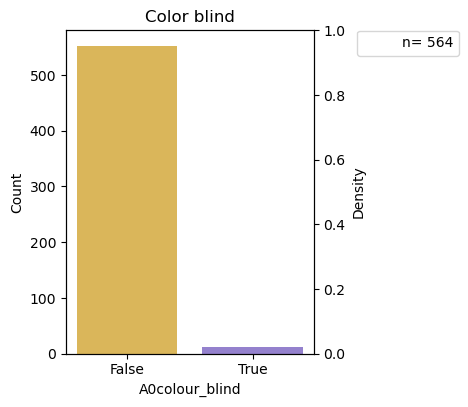

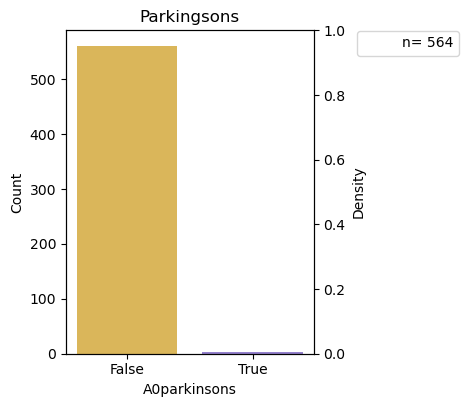

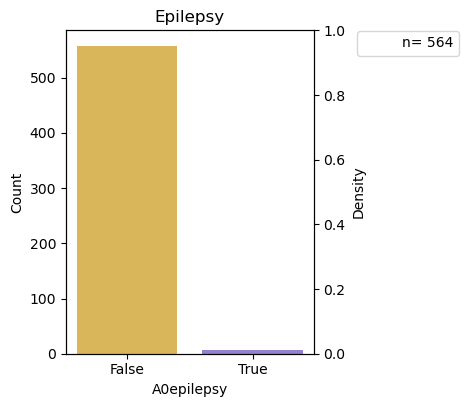

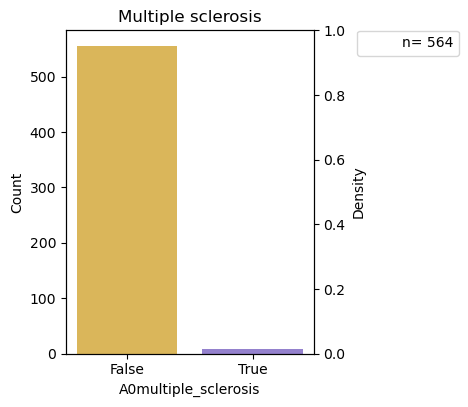

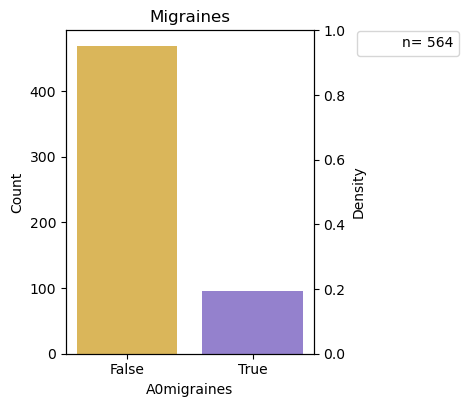

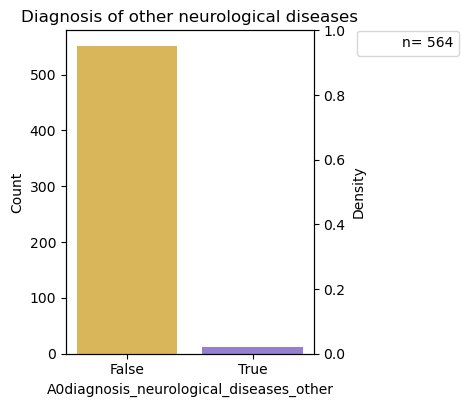

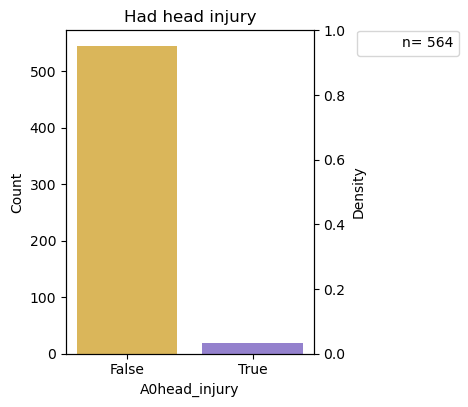

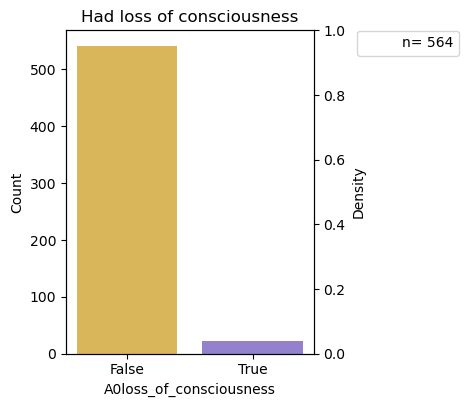

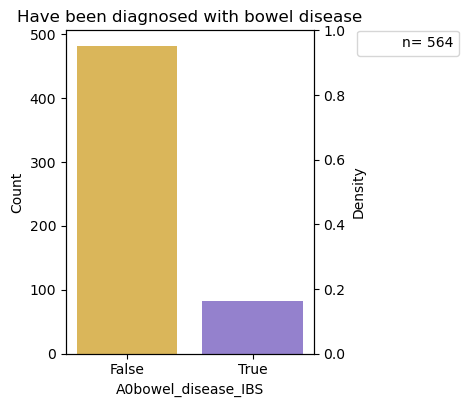

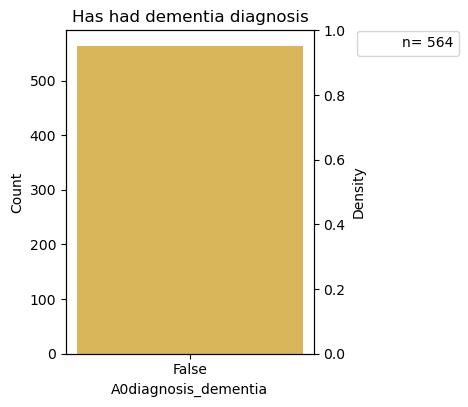

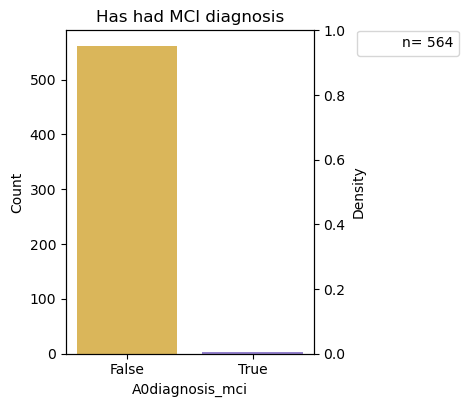

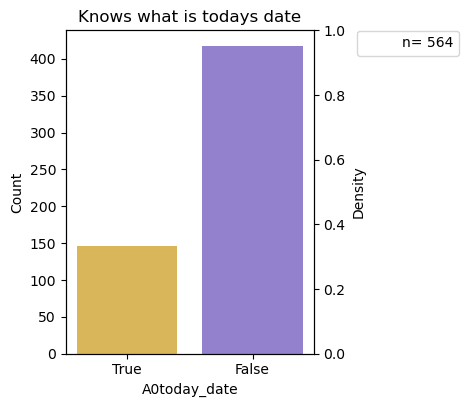

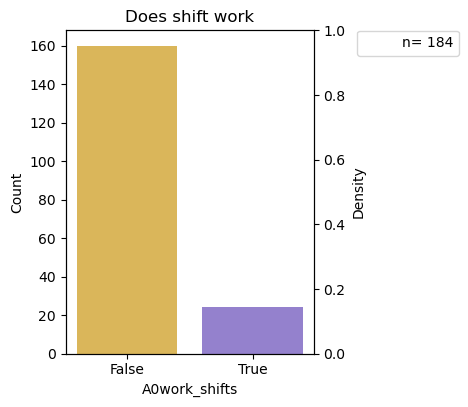

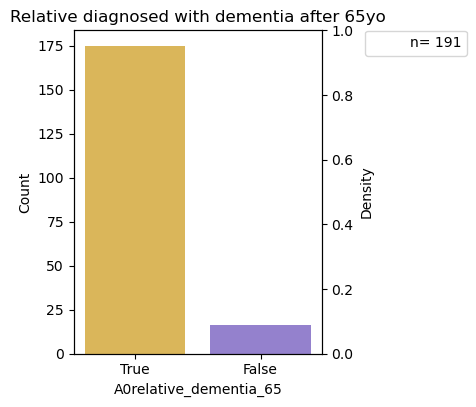

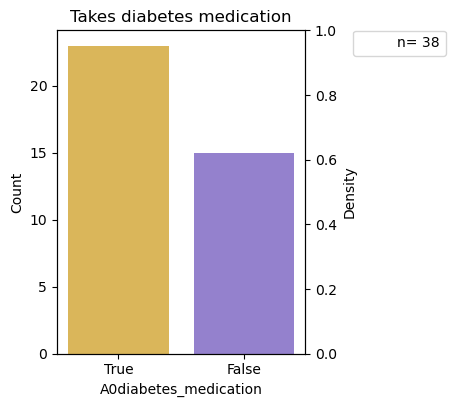

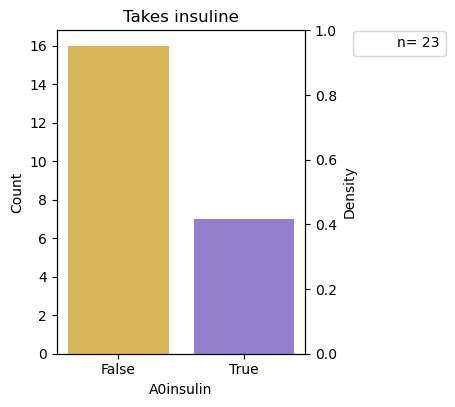

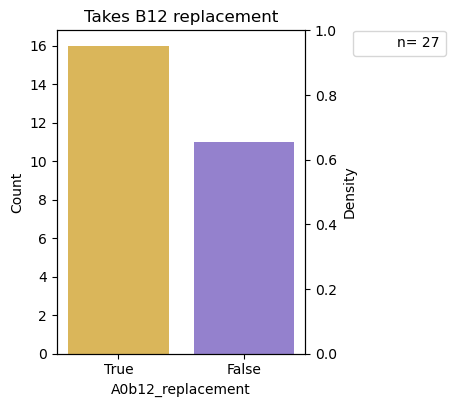

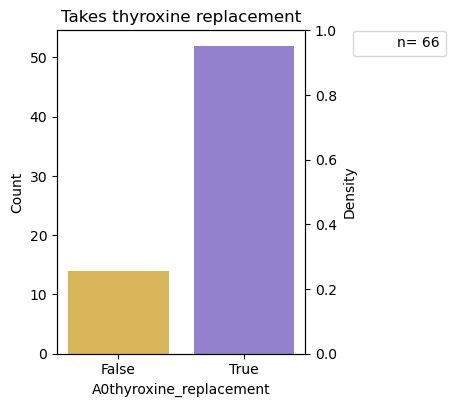

No values in A0dialysis


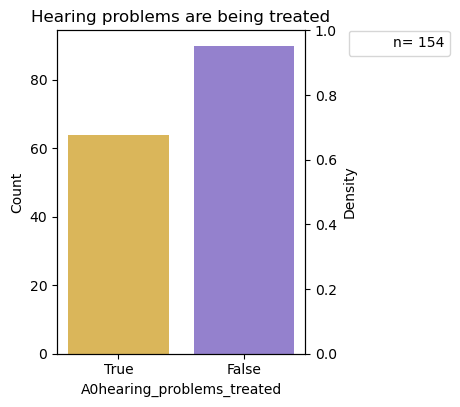

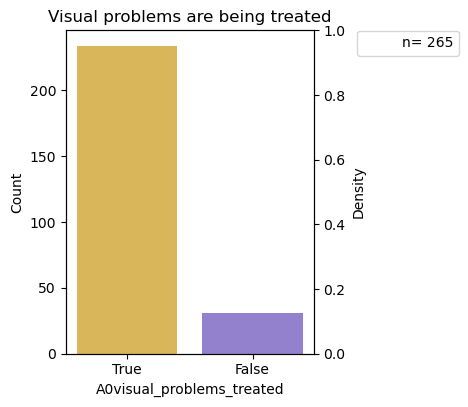

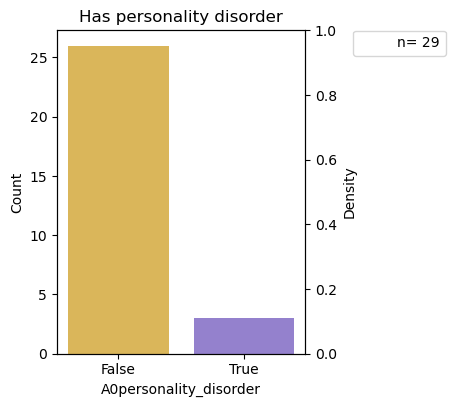

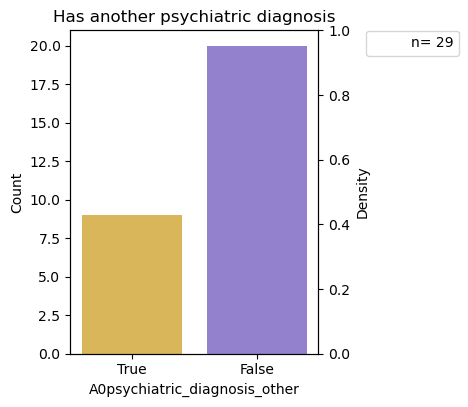

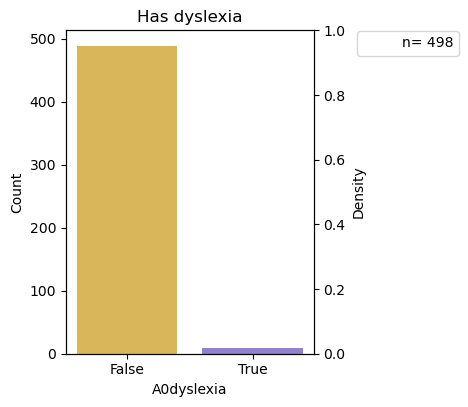

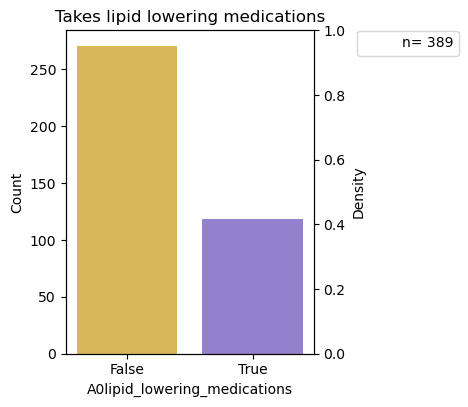

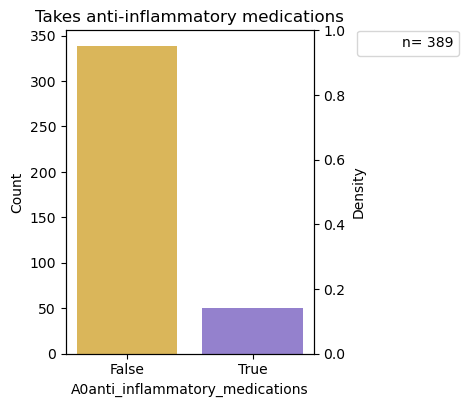

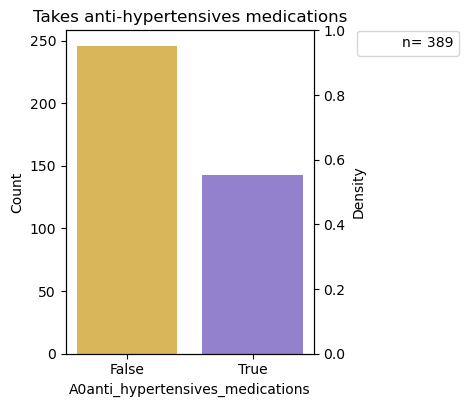

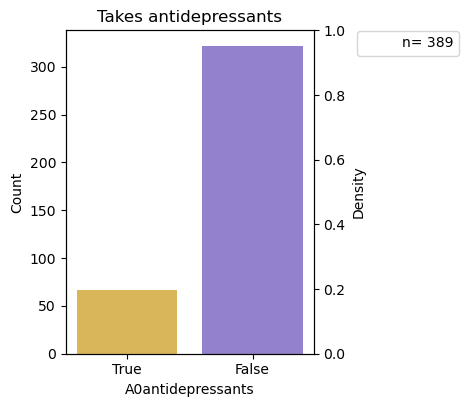

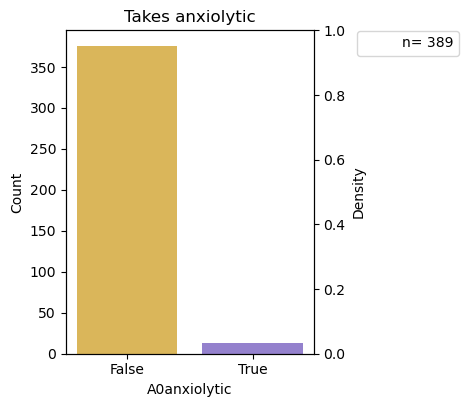

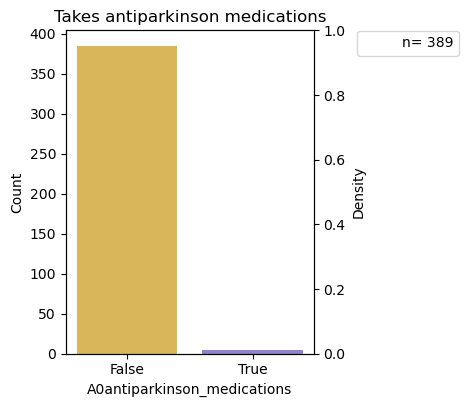

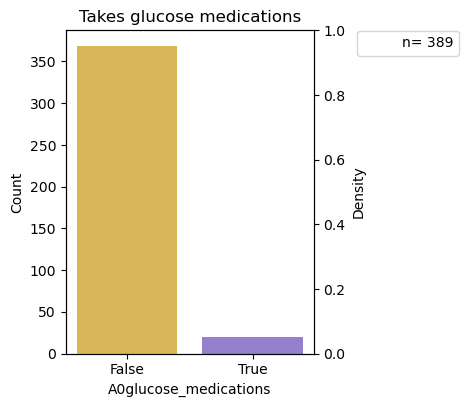

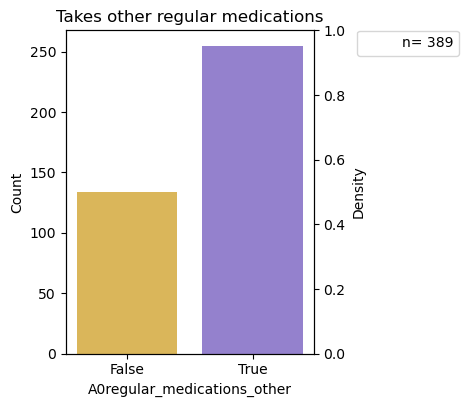

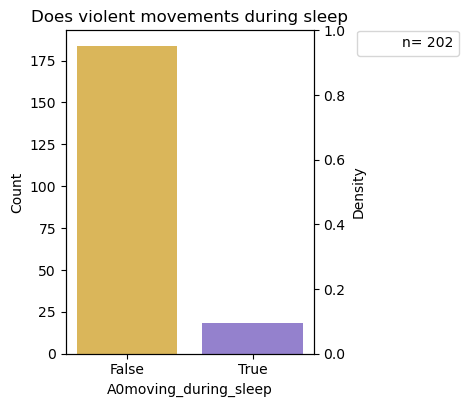

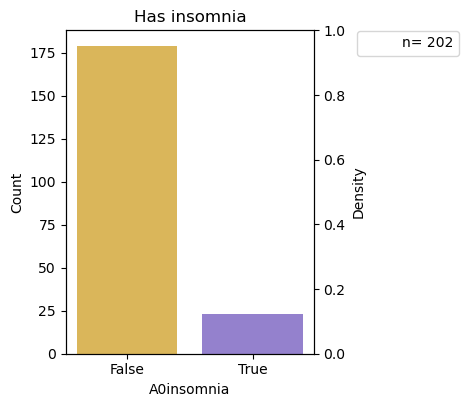

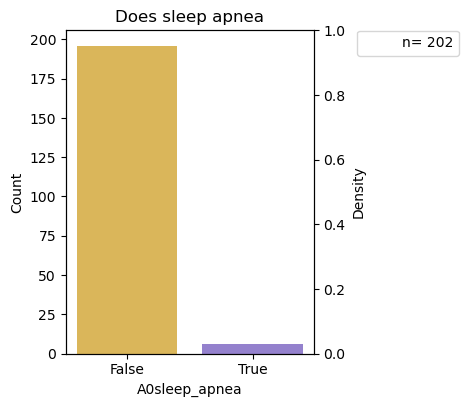

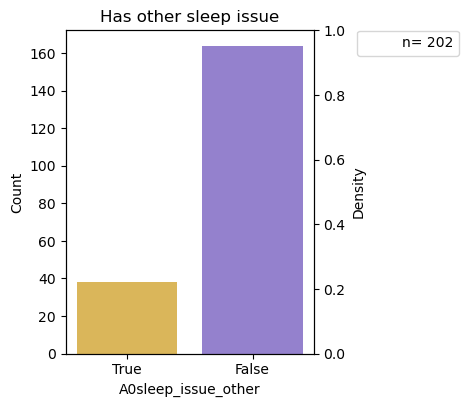

In [38]:
err = []
palette = ['#efbf45', '#8e74da']
for i in TrueFalse_all:
    var = i[0]
    title = i[1]
    # There was an error for dialysis as it has no values, so create the err list to have an action when value count = 0
    if df[var].count() == 0:
        print(f'No values in {var}')
        err.append(var)
    else: 
        plt.figure(figsize=(3.2, 4.2))
        ax = sns.countplot(data = df, x = var, palette = palette)
        plt.plot([], [], ' ', label = f'n= {df[var].count()}')
        plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.02), shadow=False, ncol=1)
        plt.title(title)
        plt.xlabel(var)
        plt.ylabel('Count')
        ax2 = ax.twinx()
        ax2.set_ylabel('Density')
        ax2.set_ylim(0,1)
        plt.show()

In [39]:
err

['A0dialysis']

## 4. string

In [40]:
len(string)

16

In [41]:
string

['A0sex',
 'A0education_level',
 'A0work_status',
 'A0retired_highest_occupation_level',
 'A0proficiency_english',
 'A0number_languages',
 'A0area_residence',
 'A0memory_compared_to_others',
 'A0memory_compared_to_years_ago',
 'A0assistance',
 'A0blood_pressure_estimation',
 'A0resting_heart_rate_estimation',
 'A0cholesterol_medication',
 'A0cholesterol_estimation',
 'A0diagnosis_neurological_diseases',
 'A0current_highest_occupation_level']

In [42]:
string_names= ['Sex',
 'Education level',
 'Work_status',
 'if retired: highest occupation level achieved',
 'English proficiency',
 'Number of languages spoken',
 'Area of residence',
 'Perceived memory compared to others',
 'Perceived memory compared to years ago',
 'Need for assistance',
 'Blood pressure estimation',
 'Resting heart rate estimation',
 'Cholesterol medication',
 'Cholesterol estimation',
 'Diagnosis of neurological diseases',
 'Current highest occupation level']

In [43]:
if len(string) == len(string_names):
    string_all = list(zip(string, string_names))
else:
    print('ERROR: lists not same length')

In [44]:
string_all

[('A0sex', 'Sex'),
 ('A0education_level', 'Education level'),
 ('A0work_status', 'Work_status'),
 ('A0retired_highest_occupation_level',
  'if retired: highest occupation level achieved'),
 ('A0proficiency_english', 'English proficiency'),
 ('A0number_languages', 'Number of languages spoken'),
 ('A0area_residence', 'Area of residence'),
 ('A0memory_compared_to_others', 'Perceived memory compared to others'),
 ('A0memory_compared_to_years_ago', 'Perceived memory compared to years ago'),
 ('A0assistance', 'Need for assistance'),
 ('A0blood_pressure_estimation', 'Blood pressure estimation'),
 ('A0resting_heart_rate_estimation', 'Resting heart rate estimation'),
 ('A0cholesterol_medication', 'Cholesterol medication'),
 ('A0cholesterol_estimation', 'Cholesterol estimation'),
 ('A0diagnosis_neurological_diseases', 'Diagnosis of neurological diseases'),
 ('A0current_highest_occupation_level', 'Current highest occupation level')]

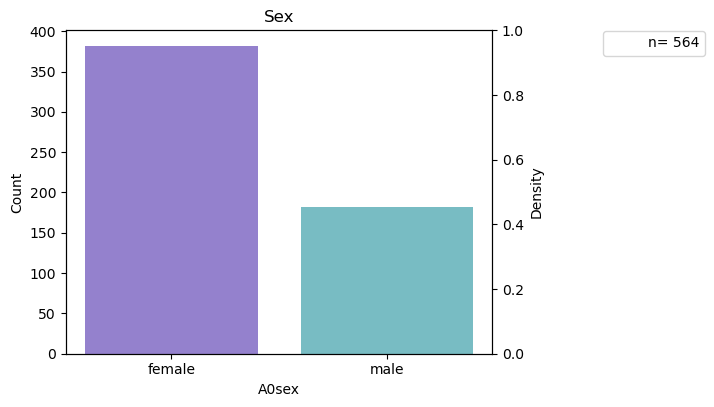

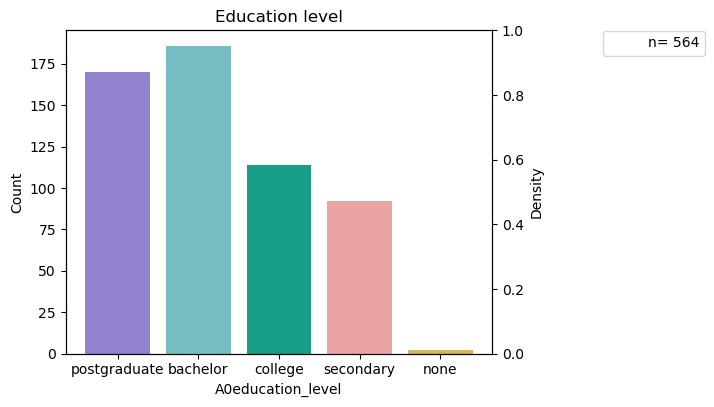

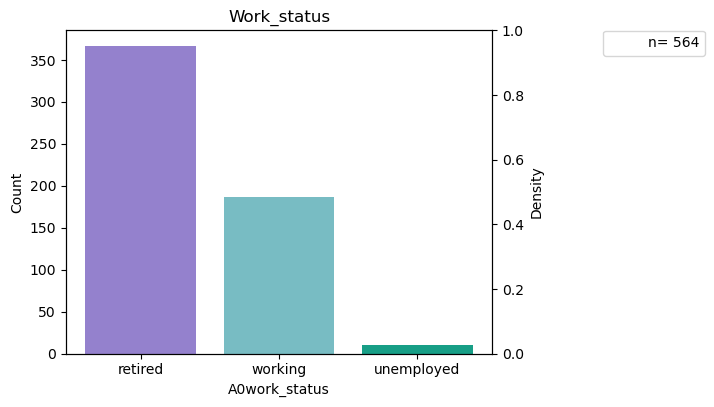

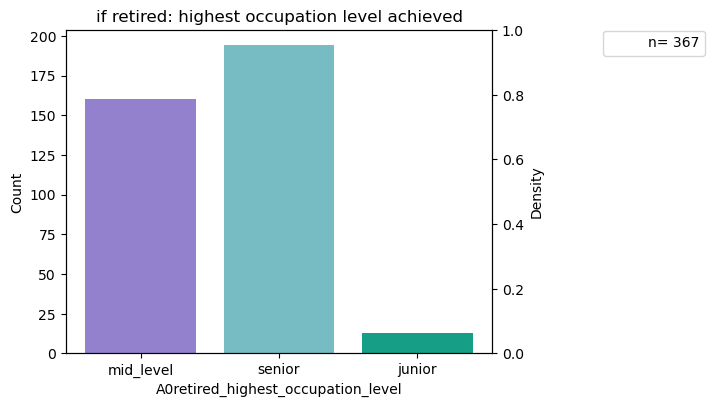

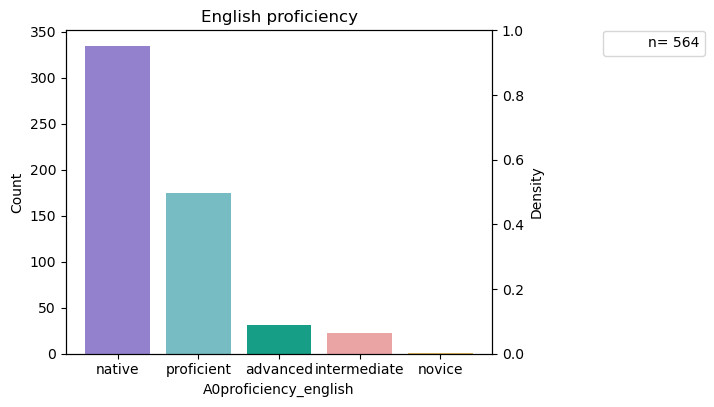

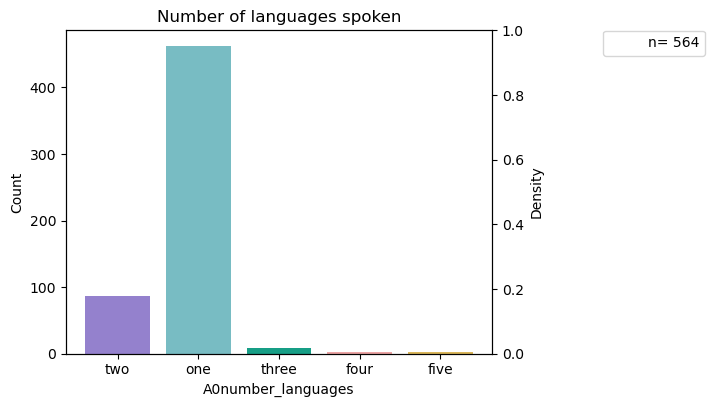

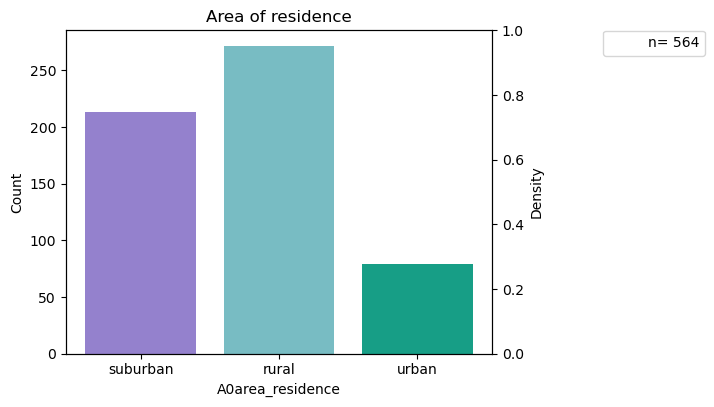

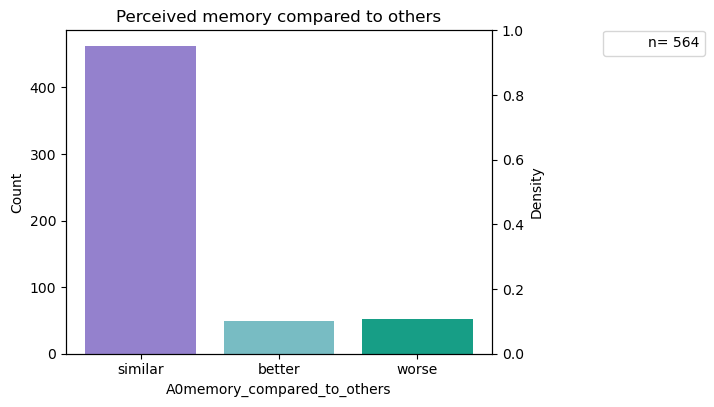

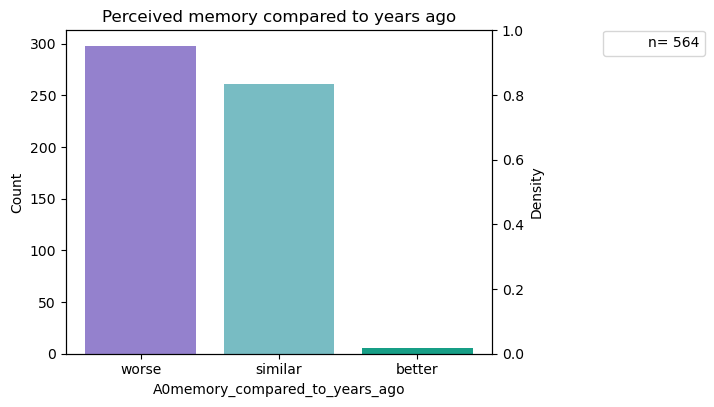

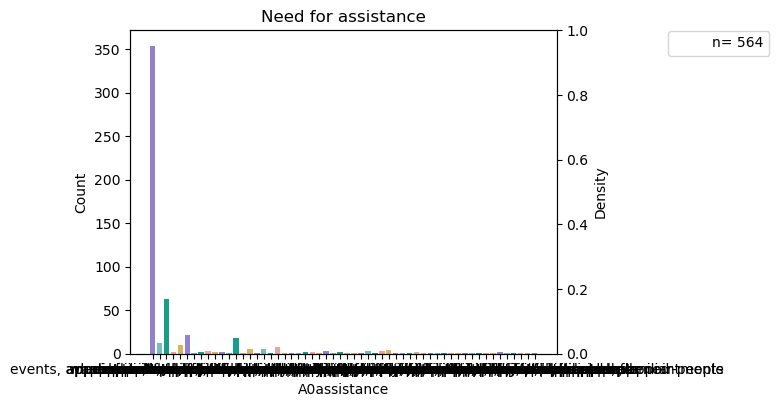

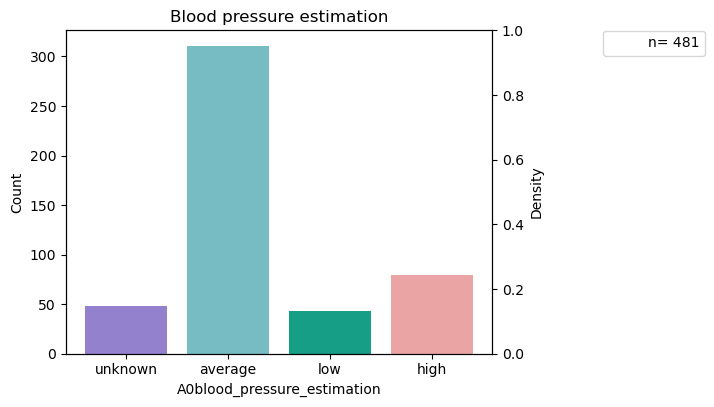

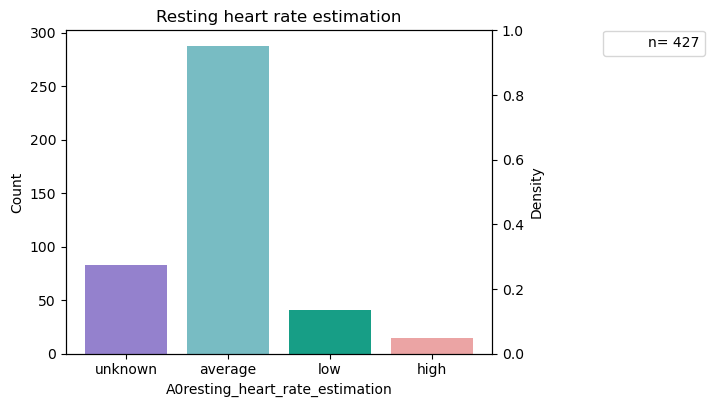

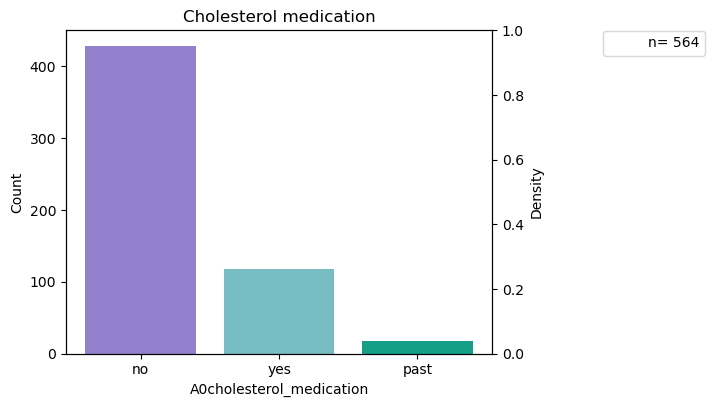

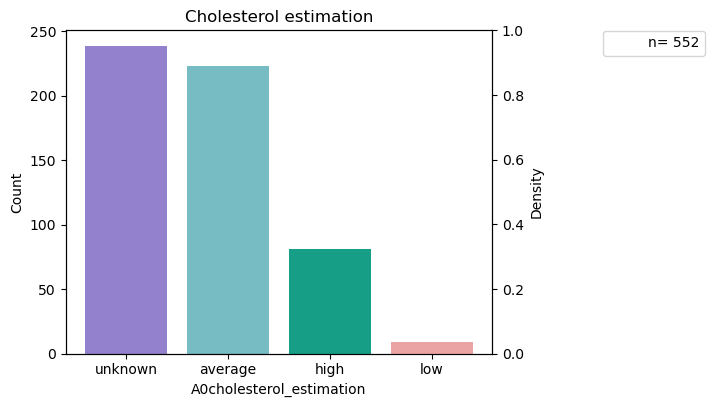

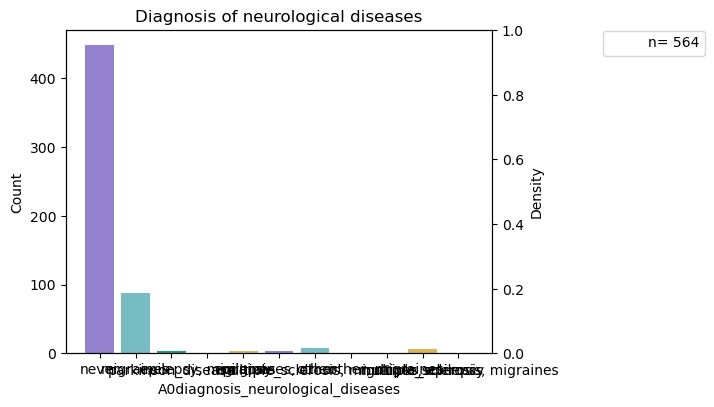

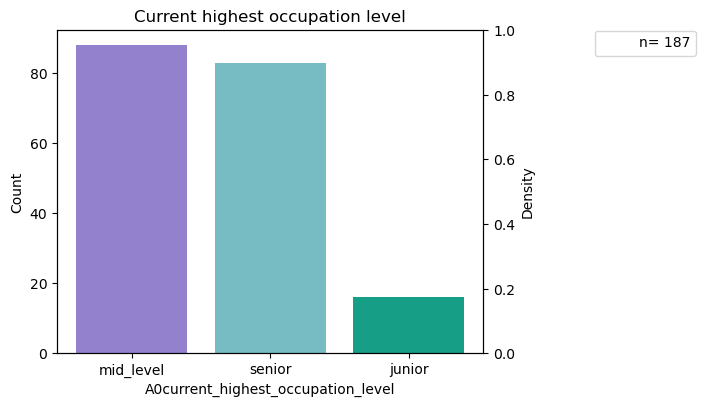

In [45]:
err = []
palette = ['#8e74da', '#6bc6d0', '#00b594', '#f79898', '#efbf45']
for i in string_all:
    var = i[0]
    title = i[1]
    # There was an error for dialysis as it has no values, so create the err list to have an action when value count = 0
    if df[var].count() == 0:
        print(f'No values in {var}')
        err.append(var)
    else: 
        plt.figure(figsize=(5.5, 4.2))
        ax = sns.countplot(data = df, x = var, palette = palette)
        plt.plot([], [], ' ', label = f'n= {df[var].count()}')
        plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.02), shadow=False, ncol=1)
        plt.title(title)
        plt.xlabel(var)
        plt.ylabel('Count')
        ax2 = ax.twinx()
        ax2.set_ylabel('Density')
        ax2.set_ylim(0,1)
        plt.show()

In [46]:
#  We see that some variables do not plot well: to redo 'A0assistance', 'A0diagnosis_neurological_diseases'

In [47]:
# A0assistance: Need for assistance

In [53]:
df['A0assistance'].unique()

array(['none', 'medications', 'familiar-people',
       'appointments, what-happened', 'what-happened, familiar-people',
       'what-happened', 'medications, what-happened',
       'events, appointments, what-happened, familiar-people',
       'appointments, familiar-people', 'what-happened, events',
       'medications, familiar-people, appointments',
       'appointments, events, medications', 'appointments',
       'events, medications, what-happened',
       'appointments, medications, familiar-people',
       'what-happened, familiar-people, events',
       'familiar-people, what-happened', 'familiar-people, events',
       'events', 'familiar-people, medications',
       'appointments, medications, what-happened, familiar-people',
       'events, occasions, familiar-people',
       'medications, what-happened, familiar-people',
       'events, what-happened', 'events, what-happened, familiar-people',
       'familiar-people, appointments',
       'events, appointments, medicatio

In [52]:
# Create new variables for Assistance displaying 3 categories

error = []
df['A0assistance_cat'] = np.nan
# Lets do them in true/false again
for l in df.index:
    if ',' in  df.loc[l, 'A0assistance']:
        df.loc[l, 'A0assistance_cat'] = 'More than one task'
    elif ',' not in  df.loc[l, 'A0assistance']:
        if df.loc[l, 'A0assistance'] == 'none':
            df.loc[l, 'A0assistance_cat'] = 'None'
        else:
            df.loc[l, 'A0assistance_cat'] = 'One task'
    else:
        df.loc[l, 'A0assistance_cat'] = np.nan
        error.append(l)

/var/folders/v1/y7275_7j2dvby3mpgs8lb9580000gn/T/ipykernel_28971/2486304676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A0assistance_cat'] = np.nan
/var/folders/v1/y7275_7j2dvby3mpgs8lb9580000gn/T/ipykernel_28971/2486304676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[l, 'A0assistance_cat'] = 'None'


In [50]:
df['A0assistanceTF'].unique()

KeyError: 'A0assistanceTF'

In [ ]:
error

In [ ]:
palette

In [ ]:
palette = ['#8e74da', '#6bc6d0', '#00b594', '#f79898', '#efbf45']
plt.figure(figsize=(5.5, 4.2))
ax = sns.countplot(data = df, x = 'A0assistance_cat', palette = palette)
plt.plot([], [], ' ', label = f'n= {df[var].count()}')
plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.02), shadow=False, ncol=1)
plt.title('Need for assistance')
plt.xlabel('A0assistance_cat')
plt.ylabel('Count')
ax2 = ax.twinx()
ax2.set_ylabel('Density')
ax2.set_ylim(0,1)
plt.show()

In [ ]:
# A0diagnosis_neurological_diseases
df['A0diagnosis_neurological_diseases'].unique()

In [ ]:
#same here as before
error = []
df['A0diagnosis_neurological_diseases_cat'] = np.nan
# Lets do them in true/false again
for l in df.index:
    if ',' in  df.loc[l, 'A0diagnosis_neurological_diseases']:
        df.loc[l, 'A0diagnosis_neurological_diseases_cat'] = 'More than one'
    elif ',' not in  df.loc[l, 'A0diagnosis_neurological_diseases']:
        if df.loc[l, 'A0diagnosis_neurological_diseases'] == 'never':
            df.loc[l, 'A0diagnosis_neurological_diseases_cat'] = 'None'
        else:
            df.loc[l, 'A0diagnosis_neurological_diseases_cat'] = 'One'
    else:
        df.loc[l, 'A0diagnosis_neurological_diseases_cat'] = np.nan
        error.append(l)

In [ ]:
df['A0diagnosis_neurological_diseases_cat'].unique()

In [ ]:
plt.figure(figsize=(5, 4.2))
ax = sns.countplot(data = df, x = 'A0diagnosis_neurological_diseases_cat', palette = palette)
plt.plot([], [], ' ', label = f'n= {df[var].count()}')
plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.02), shadow=False, ncol=1)
plt.title('Diagnosis neurological diseases')
plt.xlabel('A0diagnosis_neurological_diseases_cat')
plt.ylabel('Count')
ax2 = ax.twinx()
ax2.set_ylabel('Density')
ax2.set_ylim(0,1)
plt.show()